In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from main import get_data

(root, data_path, presidents, cities, countries, years, colors) = get_data()
timeframe = ('2018-08-01', '2022-07-31')

# Aggregated Daily Sentiment

1. Enable Data Aggregation (adding day column)
2. Data Visualization
3. Data Inspection

Enable Data Aggregation

In [15]:
def add_day_and_get_daily_sentiment(data):
    # Group the data by day and calculate the average 'Compound' value
    # convert to datetime
    data['created_at'] = pd.to_datetime(data['created_at'])
    data['day'] = data['created_at'].dt.date
    daily_sentiment = data.groupby('day')['Compound'].mean().reset_index()
    return data, daily_sentiment

def get_compound_mean(data):
    assert 'Compound' in data.columns
    return data['Compound'].mean()

In [38]:
mean_compound = pd.read_pickle('results/mean_compound.pkl')

##### Data Visualization

In [39]:
def plot_sentiment_with_highlights_and_timeframes(daily_sentiment, title, mean_location=None, num_top_points=10, num_bottom_points=10, timeframe=None, colors=None, average_compound=None, save_path=None):
    plt.figure(figsize=(15, 8))
    sns.lineplot(x='day', y='Compound', data=daily_sentiment, color=colors[1])

    top_points_list = []  # List to store top points
    bottom_points_list = []  # List to store bottom points

    if num_top_points > 0:
        top_points = daily_sentiment.nlargest(num_top_points, 'Compound')
        for index, row in top_points.iterrows():
            plt.scatter(row['day'], row['Compound'], color=colors[0], s=30, edgecolor='black', zorder=5)
            plt.text(row['day'], row['Compound'], f"{row['day']}\n{row['Compound']:.2f}", fontsize=8, va='bottom', ha='right')
            top_points_list.append((row['day'], row['Compound']))

    if num_bottom_points > 0:
        bottom_points = daily_sentiment.nsmallest(num_bottom_points, 'Compound')
        for index, row in bottom_points.iterrows():
            plt.scatter(row['day'], row['Compound'], color=colors[2], s=30, edgecolor='black', zorder=5)
            plt.text(row['day'], row['Compound'], f"{row['day']}\n{row['Compound']:.2f}", fontsize=8, va='bottom', ha='right')
            bottom_points_list.append((row['day'], row['Compound']))

    if timeframe:
        plt.axvspan(pd.to_datetime(timeframe[0]).date(), pd.to_datetime(timeframe[1]).date(), color=colors[0], alpha=0.3)

    plt.axhline(0, color='gray', linestyle='--', linewidth=1)

    if average_compound:
        plt.axhline(average_compound, color='black', linestyle='--', linewidth=2, label=f"Mean Sentiment Score ({average_compound:.2f})")
        offset = (daily_sentiment['Compound'].max() - daily_sentiment['Compound'].min()) * 0.02
        plt.text(pd.to_datetime(daily_sentiment['day'].max()), average_compound + offset, f' {average_compound:.2f}', verticalalignment='bottom', horizontalalignment='right', color='black', fontsize=10)

    if mean_location is not None:
        plt.axhline(mean_location, color=colors[0], linestyle='--', linewidth=2, label=f'Mean Location Sentiment Score ({mean_location:.2f}')
        offset = (daily_sentiment['Compound'].max() - daily_sentiment['Compound'].min()) * 0.03
        plt.text(pd.to_datetime(daily_sentiment['day'].max()), mean_location - offset, f' {mean_location:.2f}', verticalalignment='top', horizontalalignment='right', color=colors[0], fontsize=10)

    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score')
    sns.despine()
    plt.legend()
    plt.tight_layout()
    plt.ylim(-1, 1)
    if save_path:
        plt.savefig(save_path, format='png', bbox_inches='tight')
    plt.show()

    return top_points_list, bottom_points_list

def print_outliers(top_points, bottom_points):
    print("Top Points:")
    for date, sentiment in top_points:
        print(f"Date: {date}, Sentiment: {sentiment:.2f}")

    print("\nBottom Points:")
    for date, sentiment in bottom_points:
        print(f"Date: {date}, Sentiment: {sentiment:.2f}")

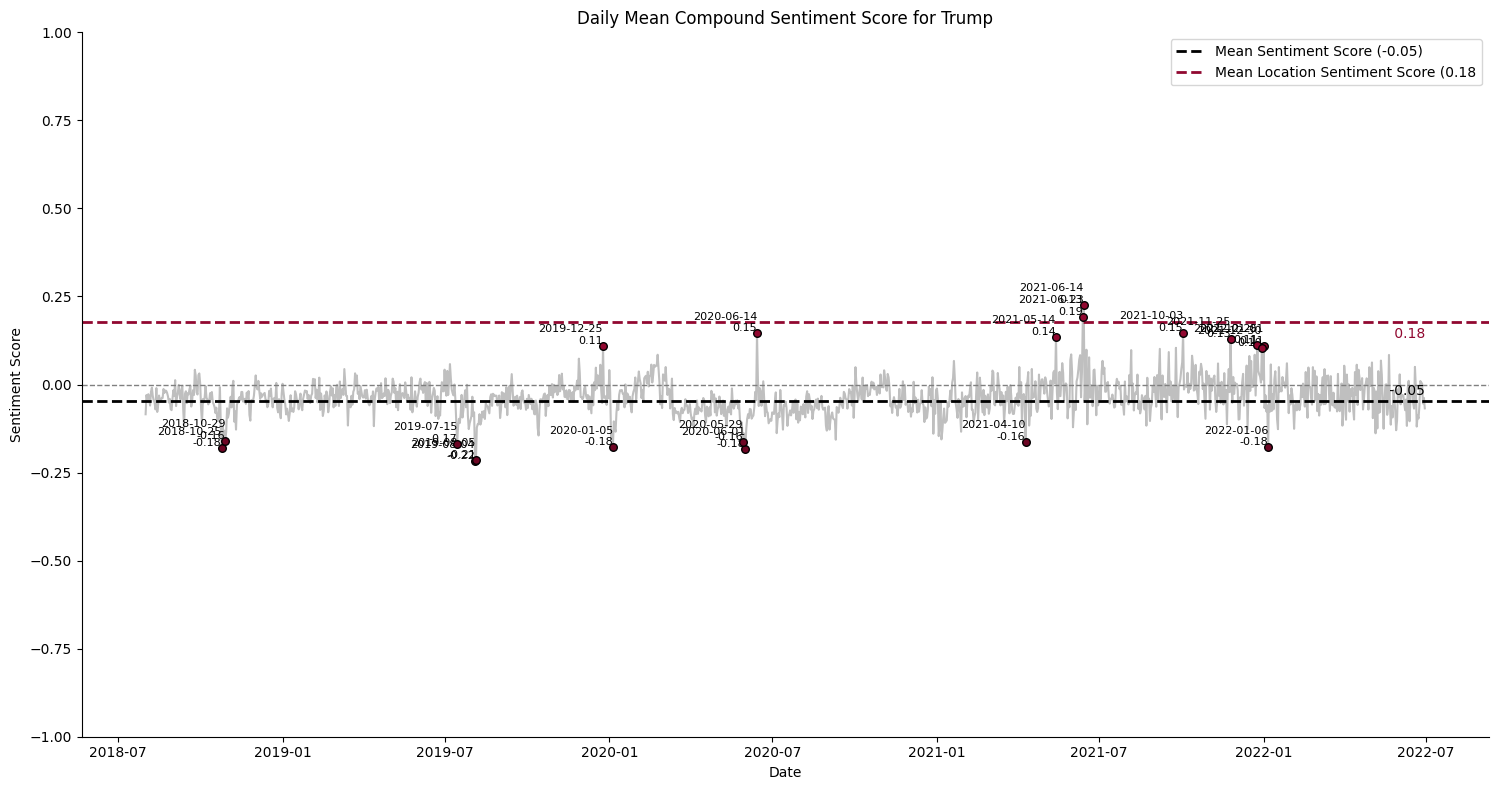

Top Points:
Date: 2021-06-14, Sentiment: 0.23
Date: 2021-06-13, Sentiment: 0.19
Date: 2021-10-03, Sentiment: 0.15
Date: 2020-06-14, Sentiment: 0.15
Date: 2021-05-14, Sentiment: 0.14
Date: 2021-11-25, Sentiment: 0.13
Date: 2021-12-25, Sentiment: 0.11
Date: 2019-12-25, Sentiment: 0.11
Date: 2022-01-01, Sentiment: 0.11
Date: 2021-12-30, Sentiment: 0.10

Bottom Points:
Date: 2019-08-04, Sentiment: -0.22
Date: 2019-08-05, Sentiment: -0.21
Date: 2020-06-01, Sentiment: -0.18
Date: 2018-10-25, Sentiment: -0.18
Date: 2022-01-06, Sentiment: -0.18
Date: 2020-01-05, Sentiment: -0.18
Date: 2019-07-15, Sentiment: -0.17
Date: 2021-04-10, Sentiment: -0.16
Date: 2020-05-29, Sentiment: -0.16
Date: 2018-10-29, Sentiment: -0.16


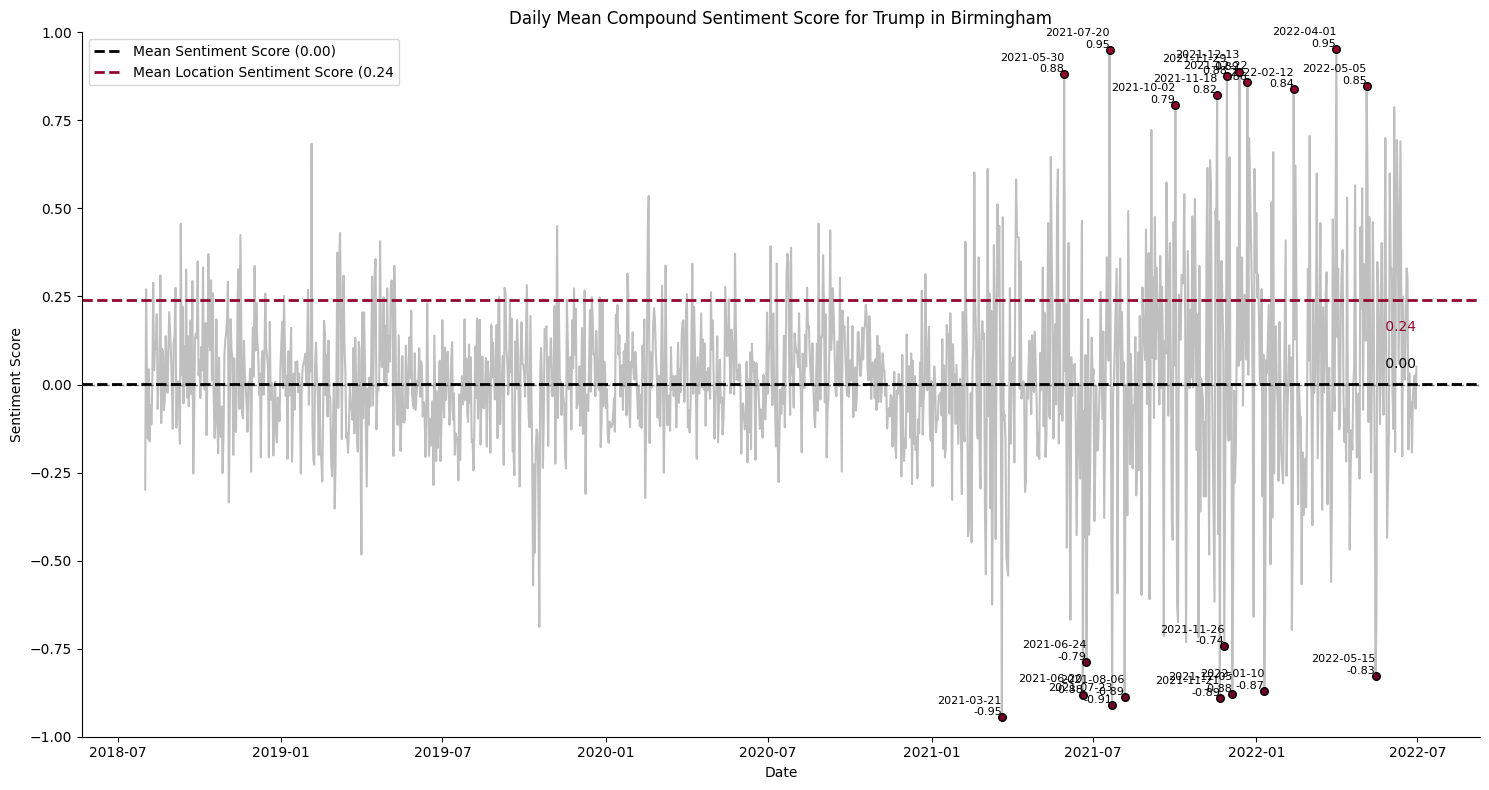

Top Points:
Date: 2022-04-01, Sentiment: 0.95
Date: 2021-07-20, Sentiment: 0.95
Date: 2021-12-13, Sentiment: 0.89
Date: 2021-05-30, Sentiment: 0.88
Date: 2021-11-29, Sentiment: 0.88
Date: 2021-12-22, Sentiment: 0.86
Date: 2022-05-05, Sentiment: 0.85
Date: 2022-02-12, Sentiment: 0.84
Date: 2021-11-18, Sentiment: 0.82
Date: 2021-10-02, Sentiment: 0.79

Bottom Points:
Date: 2021-03-21, Sentiment: -0.95
Date: 2021-07-23, Sentiment: -0.91
Date: 2021-11-21, Sentiment: -0.89
Date: 2021-08-06, Sentiment: -0.89
Date: 2021-06-20, Sentiment: -0.88
Date: 2021-12-05, Sentiment: -0.88
Date: 2022-01-10, Sentiment: -0.87
Date: 2022-05-15, Sentiment: -0.83
Date: 2021-06-24, Sentiment: -0.79
Date: 2021-11-26, Sentiment: -0.74


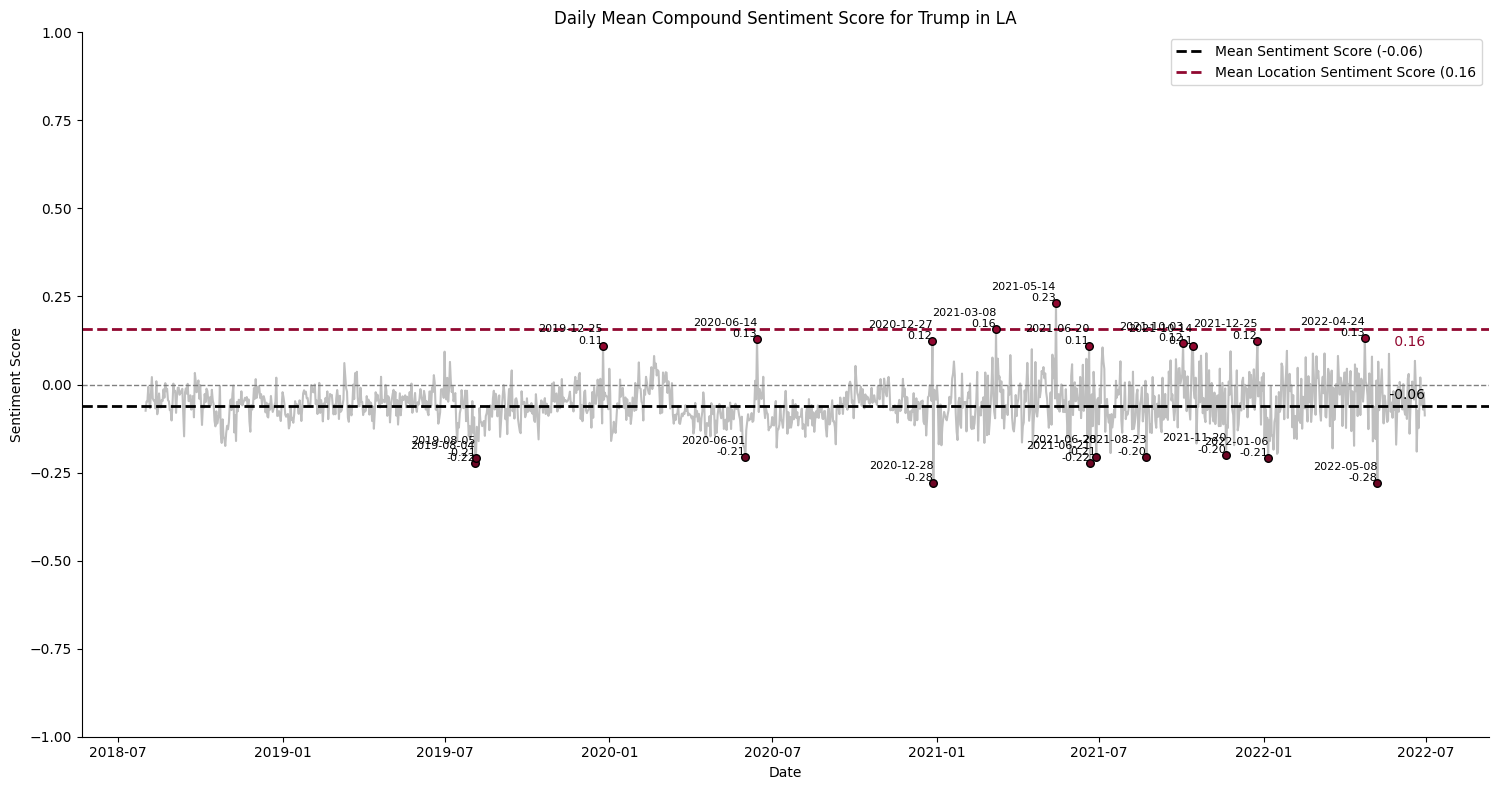

Top Points:
Date: 2021-05-14, Sentiment: 0.23
Date: 2021-03-08, Sentiment: 0.16
Date: 2022-04-24, Sentiment: 0.13
Date: 2020-06-14, Sentiment: 0.13
Date: 2021-12-25, Sentiment: 0.12
Date: 2020-12-27, Sentiment: 0.12
Date: 2021-10-03, Sentiment: 0.12
Date: 2019-12-25, Sentiment: 0.11
Date: 2021-10-14, Sentiment: 0.11
Date: 2021-06-20, Sentiment: 0.11

Bottom Points:
Date: 2022-05-08, Sentiment: -0.28
Date: 2020-12-28, Sentiment: -0.28
Date: 2021-06-21, Sentiment: -0.22
Date: 2019-08-04, Sentiment: -0.22
Date: 2022-01-06, Sentiment: -0.21
Date: 2019-08-05, Sentiment: -0.21
Date: 2020-06-01, Sentiment: -0.21
Date: 2021-06-28, Sentiment: -0.21
Date: 2021-08-23, Sentiment: -0.20
Date: 2021-11-20, Sentiment: -0.20


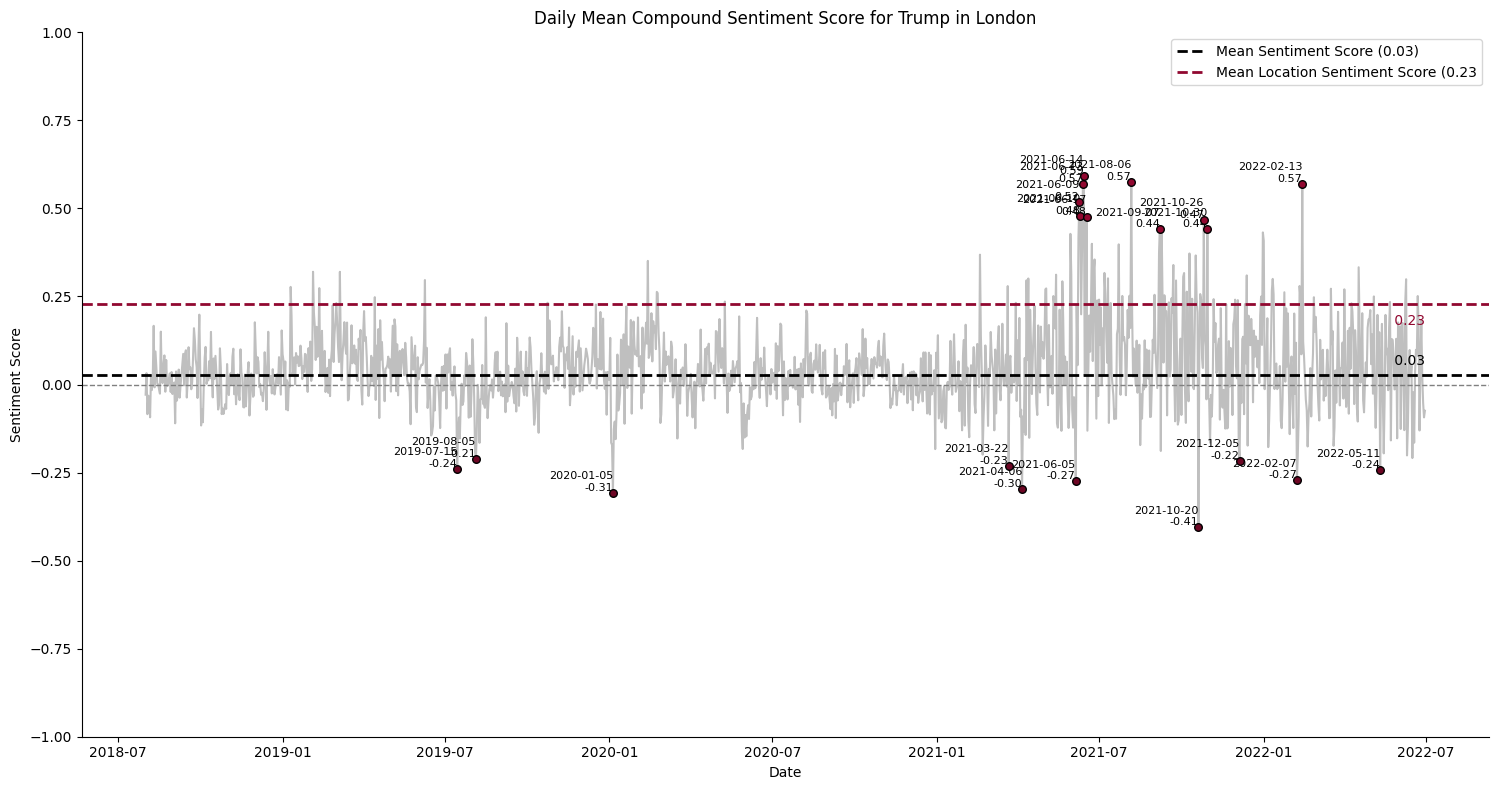

Top Points:
Date: 2021-06-14, Sentiment: 0.59
Date: 2021-08-06, Sentiment: 0.57
Date: 2022-02-13, Sentiment: 0.57
Date: 2021-06-13, Sentiment: 0.57
Date: 2021-06-09, Sentiment: 0.52
Date: 2021-06-10, Sentiment: 0.48
Date: 2021-06-17, Sentiment: 0.48
Date: 2021-10-26, Sentiment: 0.47
Date: 2021-09-07, Sentiment: 0.44
Date: 2021-10-30, Sentiment: 0.44

Bottom Points:
Date: 2021-10-20, Sentiment: -0.41
Date: 2020-01-05, Sentiment: -0.31
Date: 2021-04-06, Sentiment: -0.30
Date: 2021-06-05, Sentiment: -0.27
Date: 2022-02-07, Sentiment: -0.27
Date: 2022-05-11, Sentiment: -0.24
Date: 2019-07-15, Sentiment: -0.24
Date: 2021-03-22, Sentiment: -0.23
Date: 2021-12-05, Sentiment: -0.22
Date: 2019-08-05, Sentiment: -0.21


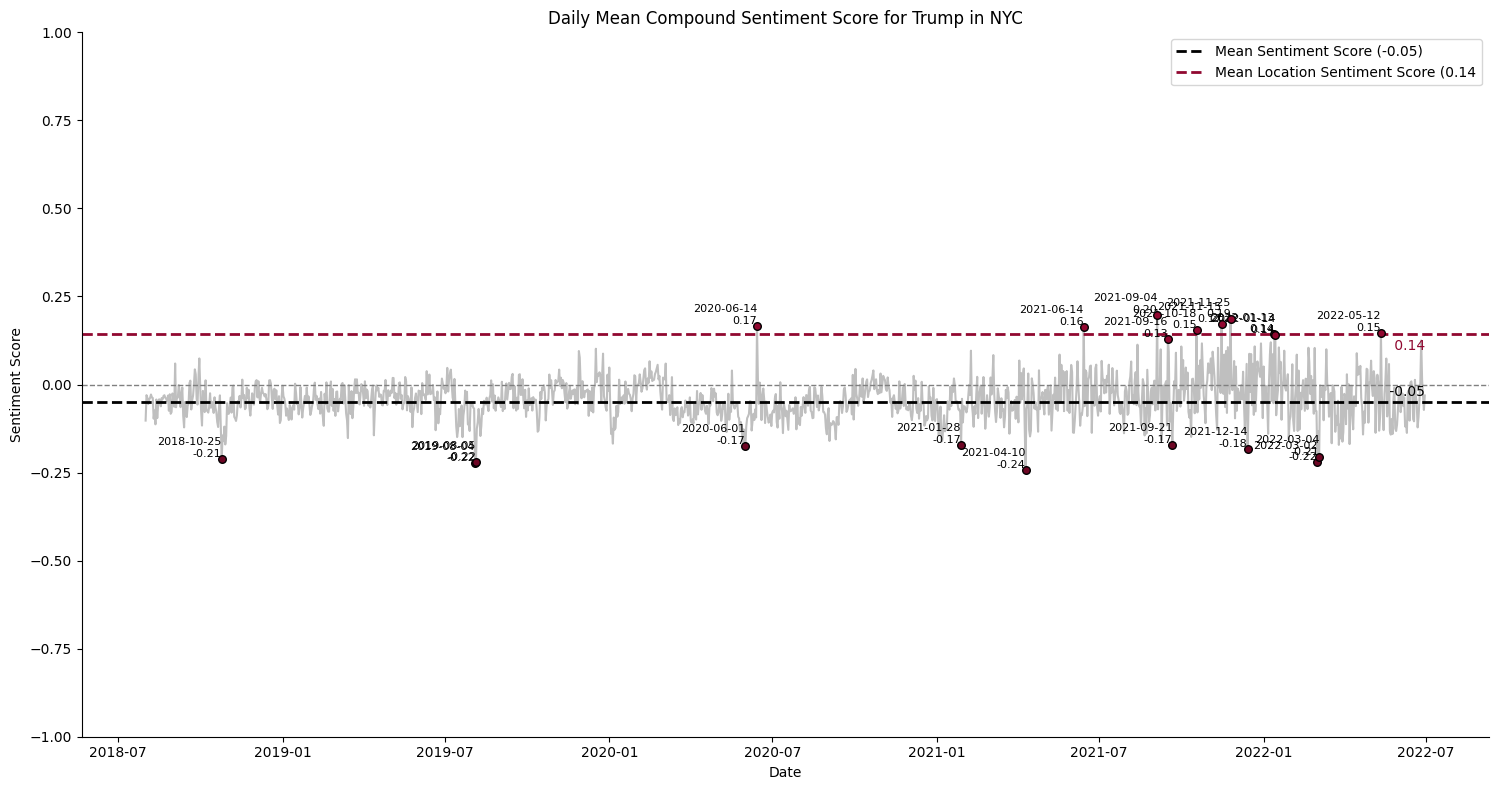

Top Points:
Date: 2021-09-04, Sentiment: 0.20
Date: 2021-11-25, Sentiment: 0.19
Date: 2021-11-15, Sentiment: 0.17
Date: 2020-06-14, Sentiment: 0.17
Date: 2021-06-14, Sentiment: 0.16
Date: 2021-10-18, Sentiment: 0.15
Date: 2022-05-12, Sentiment: 0.15
Date: 2022-01-13, Sentiment: 0.14
Date: 2022-01-14, Sentiment: 0.14
Date: 2021-09-16, Sentiment: 0.13

Bottom Points:
Date: 2021-04-10, Sentiment: -0.24
Date: 2019-08-04, Sentiment: -0.22
Date: 2019-08-05, Sentiment: -0.22
Date: 2022-03-02, Sentiment: -0.22
Date: 2018-10-25, Sentiment: -0.21
Date: 2022-03-04, Sentiment: -0.21
Date: 2021-12-14, Sentiment: -0.18
Date: 2020-06-01, Sentiment: -0.17
Date: 2021-09-21, Sentiment: -0.17
Date: 2021-01-28, Sentiment: -0.17


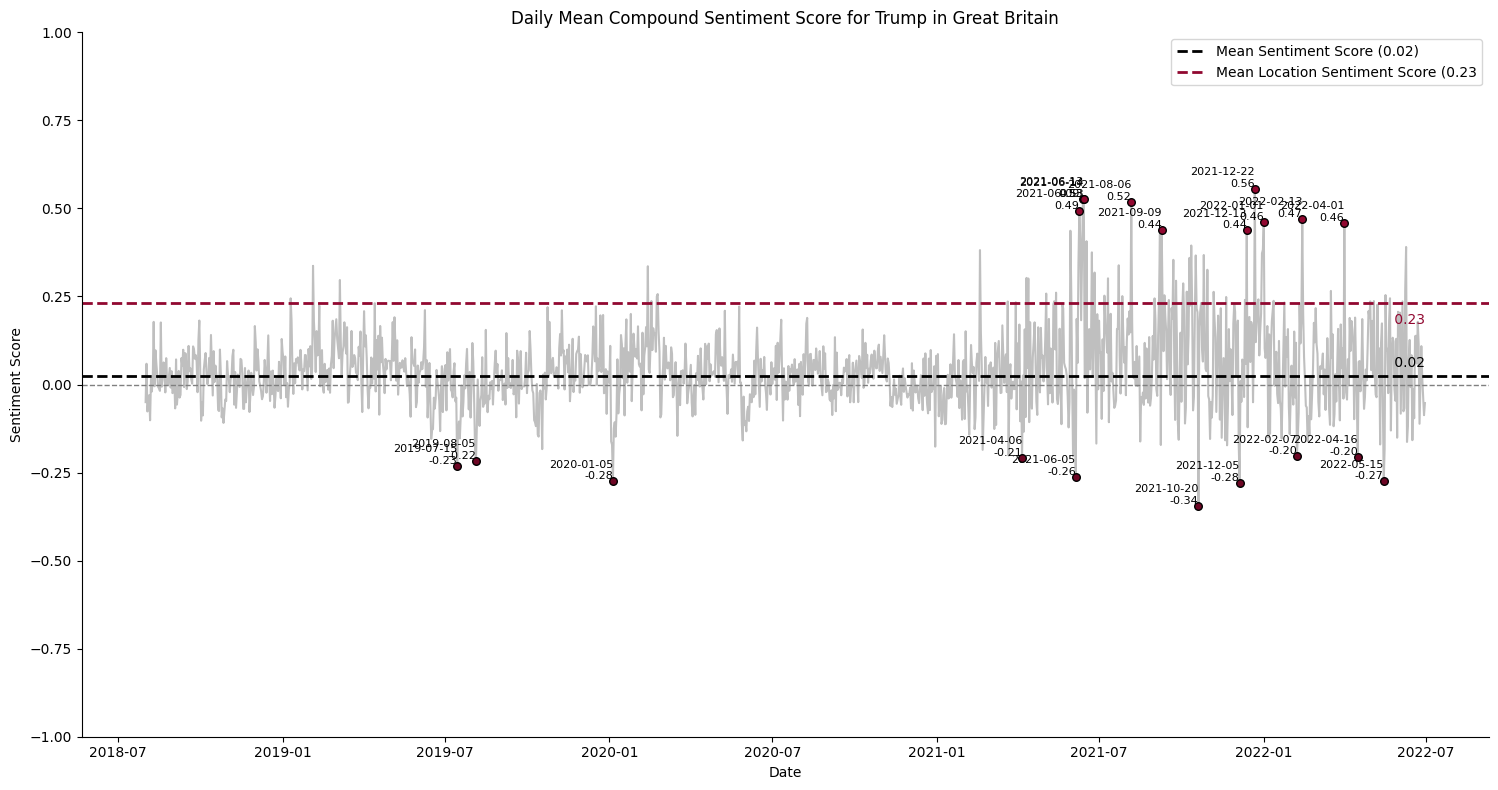

Top Points:
Date: 2021-12-22, Sentiment: 0.56
Date: 2021-06-13, Sentiment: 0.53
Date: 2021-06-14, Sentiment: 0.53
Date: 2021-08-06, Sentiment: 0.52
Date: 2021-06-09, Sentiment: 0.49
Date: 2022-02-13, Sentiment: 0.47
Date: 2022-01-01, Sentiment: 0.46
Date: 2022-04-01, Sentiment: 0.46
Date: 2021-09-09, Sentiment: 0.44
Date: 2021-12-13, Sentiment: 0.44

Bottom Points:
Date: 2021-10-20, Sentiment: -0.34
Date: 2021-12-05, Sentiment: -0.28
Date: 2020-01-05, Sentiment: -0.28
Date: 2022-05-15, Sentiment: -0.27
Date: 2021-06-05, Sentiment: -0.26
Date: 2019-07-15, Sentiment: -0.23
Date: 2019-08-05, Sentiment: -0.22
Date: 2021-04-06, Sentiment: -0.21
Date: 2022-04-16, Sentiment: -0.20
Date: 2022-02-07, Sentiment: -0.20


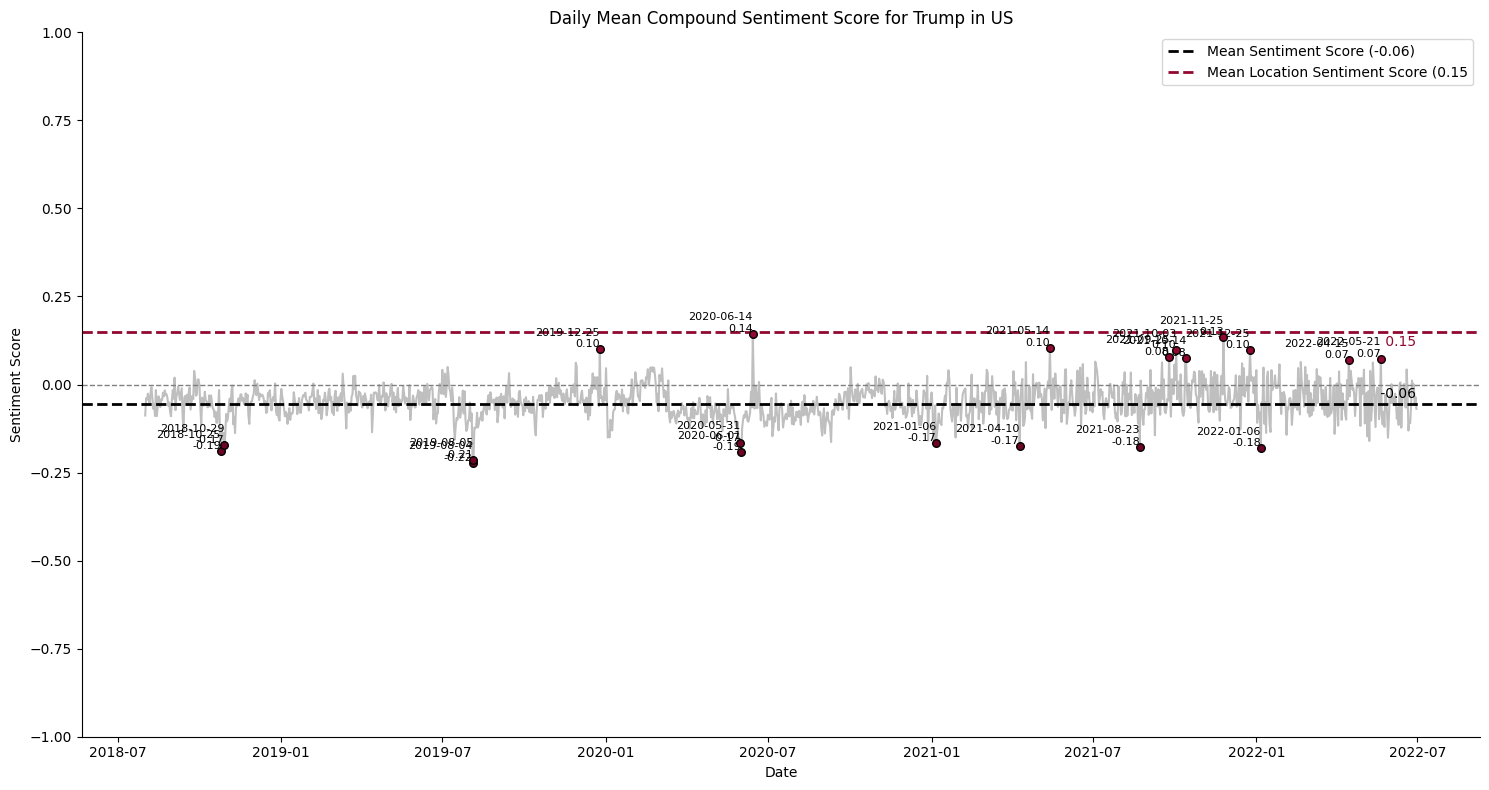

Top Points:
Date: 2020-06-14, Sentiment: 0.14
Date: 2021-11-25, Sentiment: 0.13
Date: 2021-05-14, Sentiment: 0.10
Date: 2019-12-25, Sentiment: 0.10
Date: 2021-10-03, Sentiment: 0.10
Date: 2021-12-25, Sentiment: 0.10
Date: 2021-09-25, Sentiment: 0.08
Date: 2021-10-14, Sentiment: 0.08
Date: 2022-05-21, Sentiment: 0.07
Date: 2022-04-15, Sentiment: 0.07

Bottom Points:
Date: 2019-08-04, Sentiment: -0.22
Date: 2019-08-05, Sentiment: -0.21
Date: 2020-06-01, Sentiment: -0.19
Date: 2018-10-25, Sentiment: -0.19
Date: 2022-01-06, Sentiment: -0.18
Date: 2021-08-23, Sentiment: -0.18
Date: 2021-04-10, Sentiment: -0.17
Date: 2018-10-29, Sentiment: -0.17
Date: 2021-01-06, Sentiment: -0.17
Date: 2020-05-31, Sentiment: -0.17


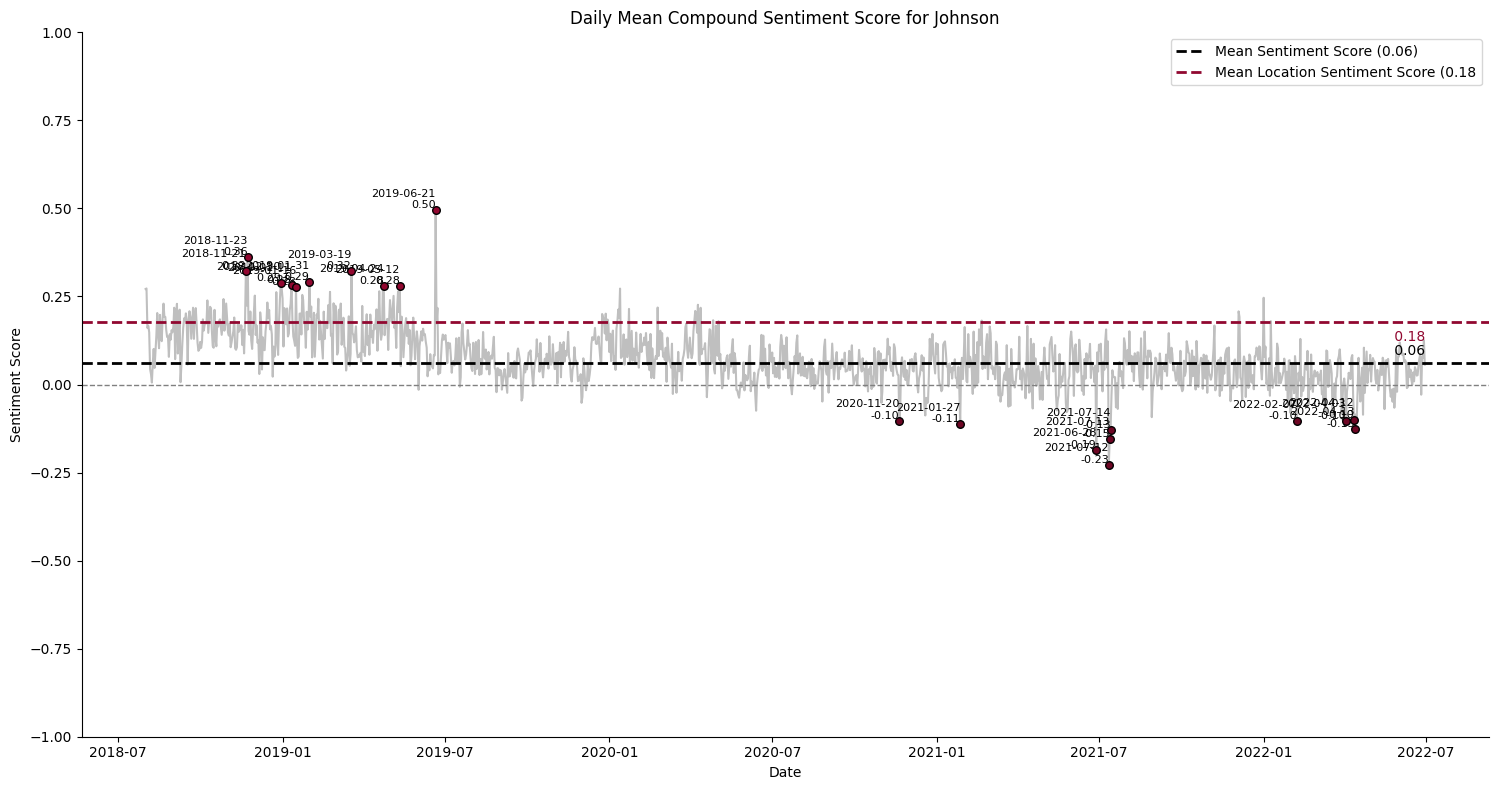

Top Points:
Date: 2019-06-21, Sentiment: 0.50
Date: 2018-11-23, Sentiment: 0.36
Date: 2018-11-21, Sentiment: 0.32
Date: 2019-03-19, Sentiment: 0.32
Date: 2019-01-31, Sentiment: 0.29
Date: 2018-12-30, Sentiment: 0.29
Date: 2019-01-11, Sentiment: 0.28
Date: 2019-04-24, Sentiment: 0.28
Date: 2019-05-12, Sentiment: 0.28
Date: 2019-01-16, Sentiment: 0.28

Bottom Points:
Date: 2021-07-12, Sentiment: -0.23
Date: 2021-06-28, Sentiment: -0.19
Date: 2021-07-13, Sentiment: -0.15
Date: 2021-07-14, Sentiment: -0.13
Date: 2022-04-13, Sentiment: -0.13
Date: 2021-01-27, Sentiment: -0.11
Date: 2022-02-07, Sentiment: -0.10
Date: 2022-04-03, Sentiment: -0.10
Date: 2020-11-20, Sentiment: -0.10
Date: 2022-04-12, Sentiment: -0.10


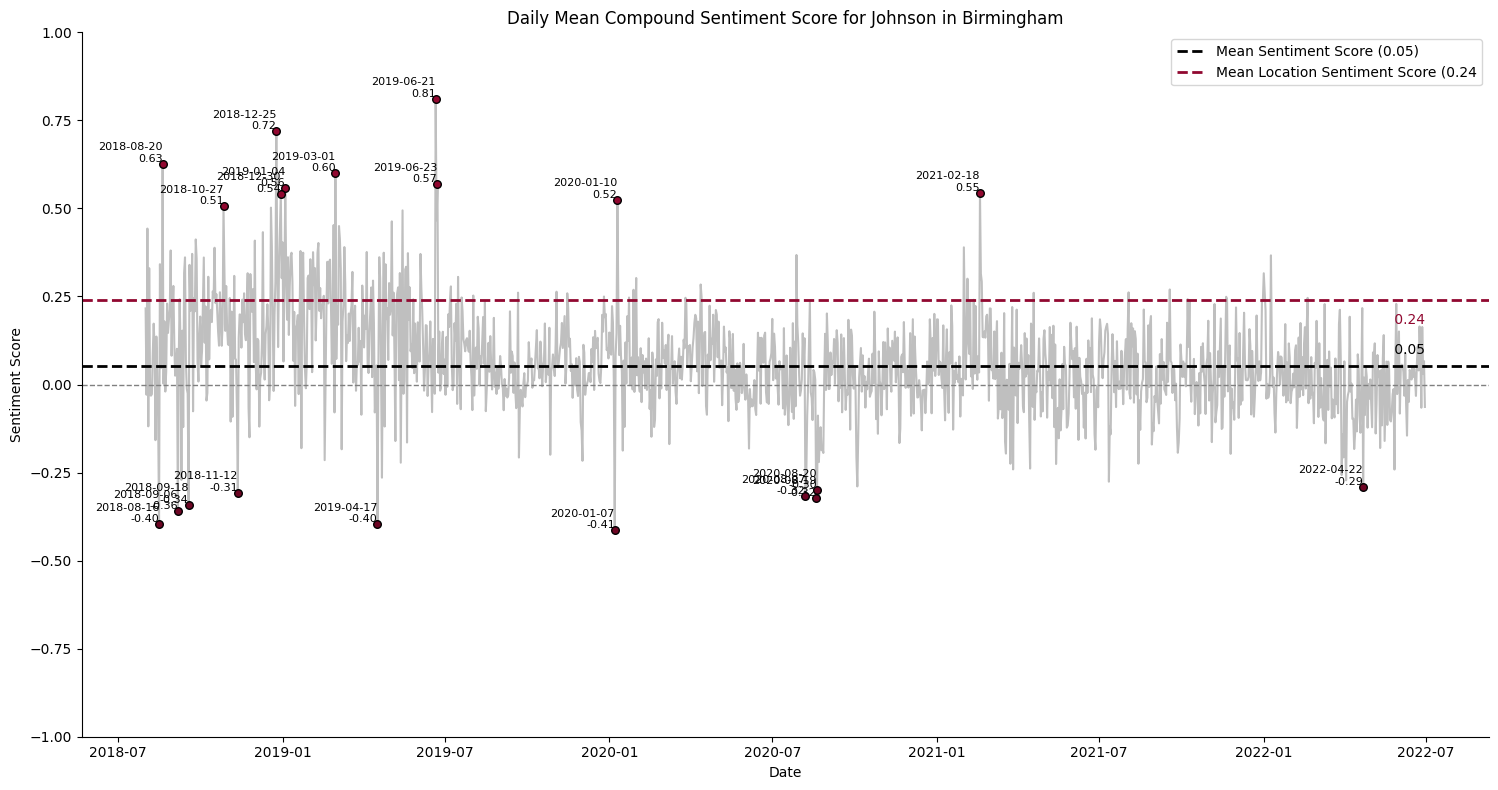

Top Points:
Date: 2019-06-21, Sentiment: 0.81
Date: 2018-12-25, Sentiment: 0.72
Date: 2018-08-20, Sentiment: 0.63
Date: 2019-03-01, Sentiment: 0.60
Date: 2019-06-23, Sentiment: 0.57
Date: 2019-01-04, Sentiment: 0.56
Date: 2021-02-18, Sentiment: 0.55
Date: 2018-12-30, Sentiment: 0.54
Date: 2020-01-10, Sentiment: 0.52
Date: 2018-10-27, Sentiment: 0.51

Bottom Points:
Date: 2020-01-07, Sentiment: -0.41
Date: 2019-04-17, Sentiment: -0.40
Date: 2018-08-16, Sentiment: -0.40
Date: 2018-09-06, Sentiment: -0.36
Date: 2018-09-18, Sentiment: -0.34
Date: 2020-08-19, Sentiment: -0.32
Date: 2020-08-07, Sentiment: -0.32
Date: 2018-11-12, Sentiment: -0.31
Date: 2020-08-20, Sentiment: -0.30
Date: 2022-04-22, Sentiment: -0.29


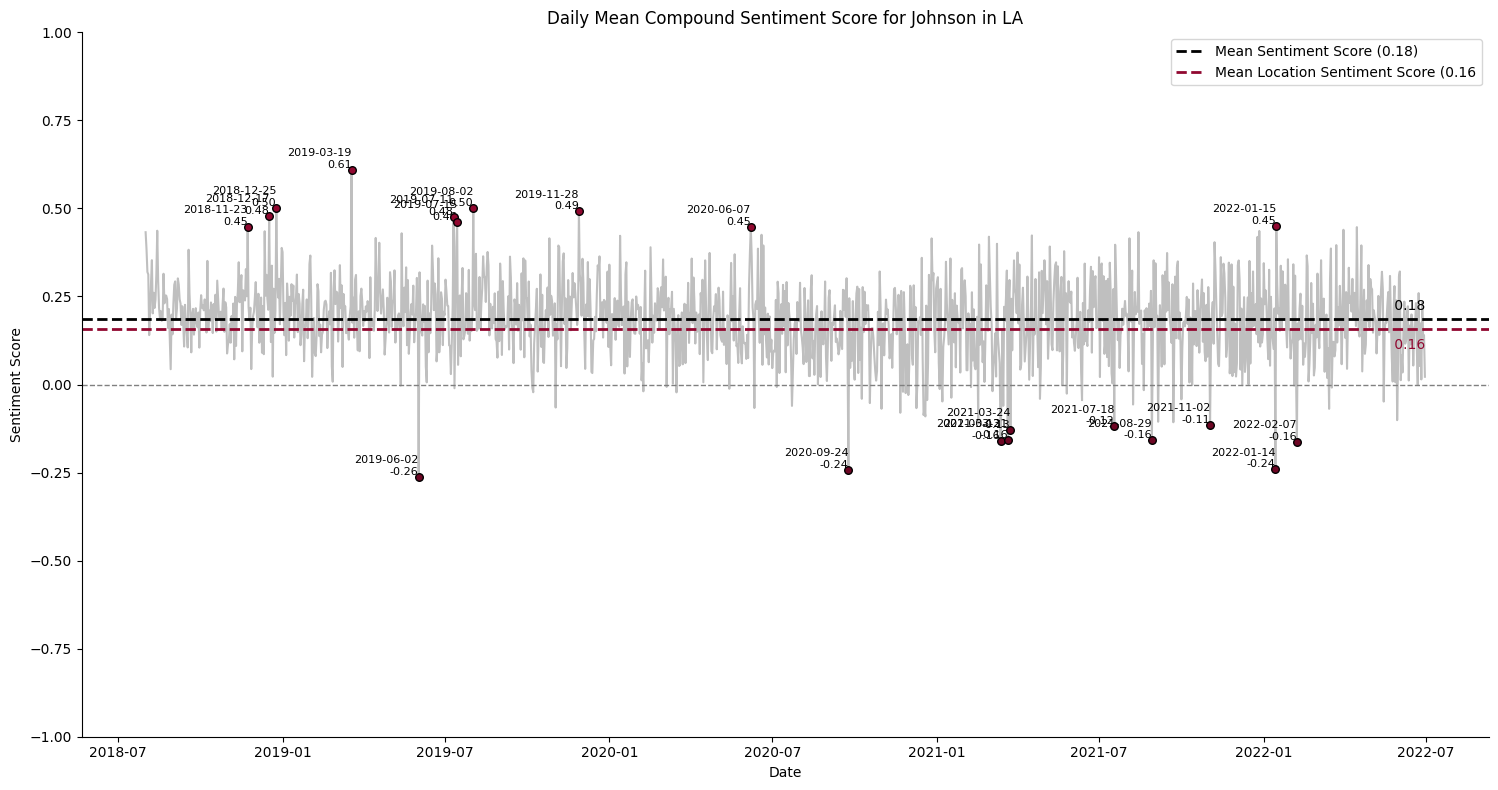

Top Points:
Date: 2019-03-19, Sentiment: 0.61
Date: 2018-12-25, Sentiment: 0.50
Date: 2019-08-02, Sentiment: 0.50
Date: 2019-11-28, Sentiment: 0.49
Date: 2018-12-17, Sentiment: 0.48
Date: 2019-07-11, Sentiment: 0.48
Date: 2019-07-15, Sentiment: 0.46
Date: 2022-01-15, Sentiment: 0.45
Date: 2018-11-23, Sentiment: 0.45
Date: 2020-06-07, Sentiment: 0.45

Bottom Points:
Date: 2019-06-02, Sentiment: -0.26
Date: 2020-09-24, Sentiment: -0.24
Date: 2022-01-14, Sentiment: -0.24
Date: 2022-02-07, Sentiment: -0.16
Date: 2021-03-13, Sentiment: -0.16
Date: 2021-08-29, Sentiment: -0.16
Date: 2021-03-21, Sentiment: -0.16
Date: 2021-03-24, Sentiment: -0.13
Date: 2021-07-18, Sentiment: -0.12
Date: 2021-11-02, Sentiment: -0.11


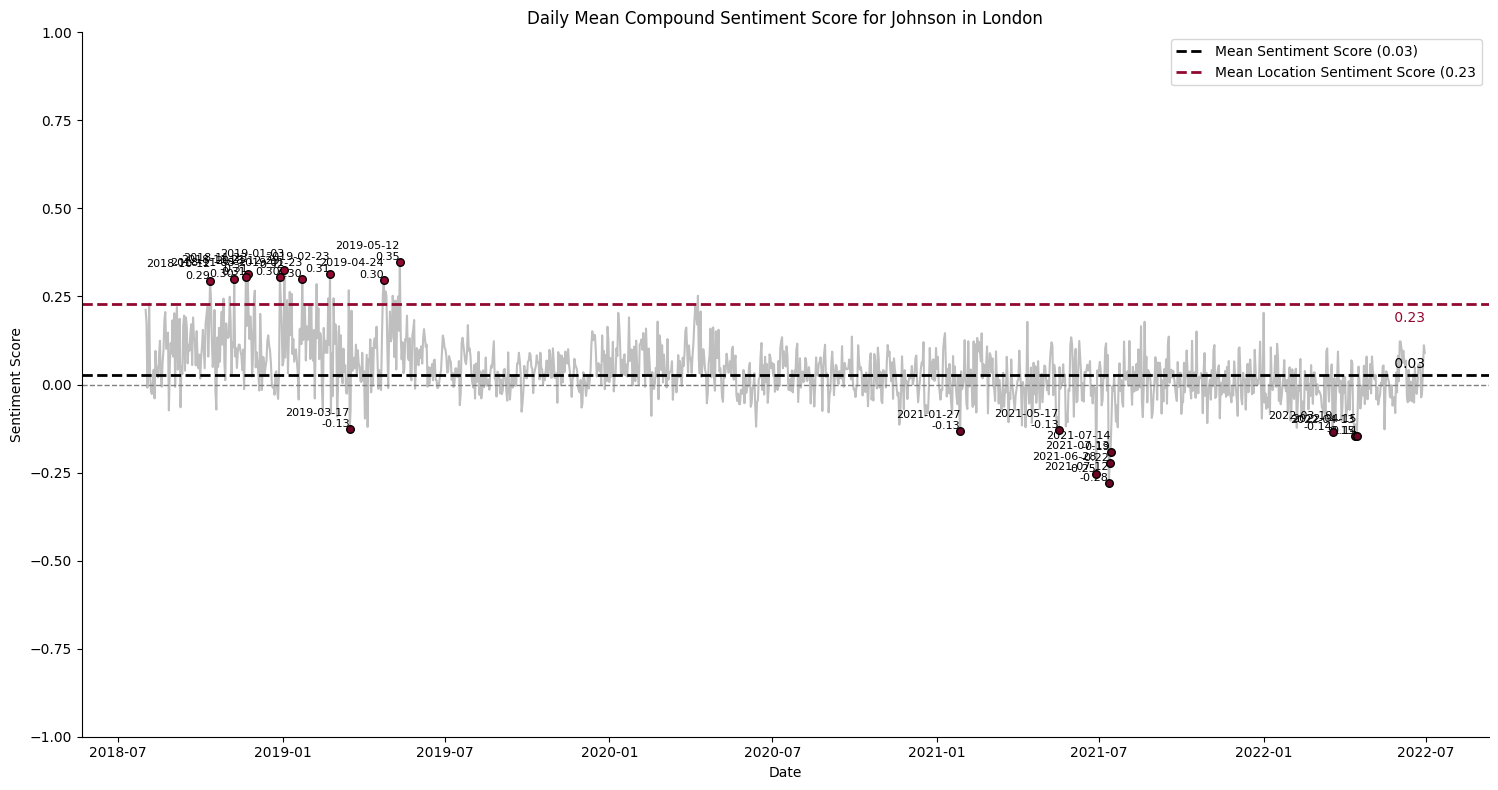

Top Points:
Date: 2019-05-12, Sentiment: 0.35
Date: 2019-01-03, Sentiment: 0.32
Date: 2019-02-23, Sentiment: 0.31
Date: 2018-11-23, Sentiment: 0.31
Date: 2018-11-21, Sentiment: 0.31
Date: 2018-12-29, Sentiment: 0.30
Date: 2019-01-23, Sentiment: 0.30
Date: 2018-11-08, Sentiment: 0.30
Date: 2019-04-24, Sentiment: 0.30
Date: 2018-10-12, Sentiment: 0.29

Bottom Points:
Date: 2021-07-12, Sentiment: -0.28
Date: 2021-06-28, Sentiment: -0.25
Date: 2021-07-13, Sentiment: -0.22
Date: 2021-07-14, Sentiment: -0.19
Date: 2022-04-13, Sentiment: -0.15
Date: 2022-04-15, Sentiment: -0.14
Date: 2022-03-19, Sentiment: -0.14
Date: 2021-01-27, Sentiment: -0.13
Date: 2021-05-17, Sentiment: -0.13
Date: 2019-03-17, Sentiment: -0.13


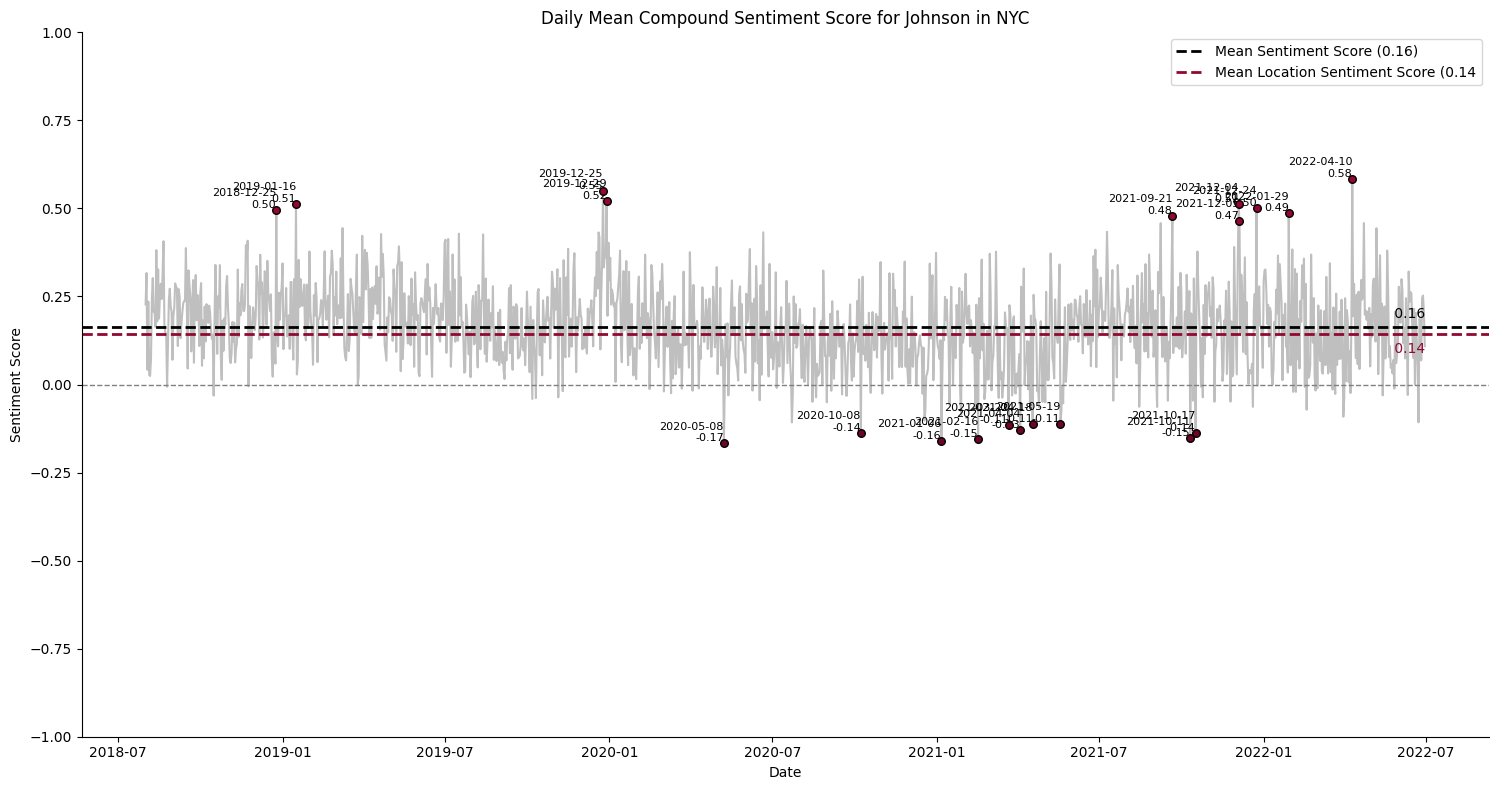

Top Points:
Date: 2022-04-10, Sentiment: 0.58
Date: 2019-12-25, Sentiment: 0.55
Date: 2019-12-29, Sentiment: 0.52
Date: 2019-01-16, Sentiment: 0.51
Date: 2021-12-04, Sentiment: 0.51
Date: 2021-12-24, Sentiment: 0.50
Date: 2018-12-25, Sentiment: 0.50
Date: 2022-01-29, Sentiment: 0.49
Date: 2021-09-21, Sentiment: 0.48
Date: 2021-12-05, Sentiment: 0.47

Bottom Points:
Date: 2020-05-08, Sentiment: -0.17
Date: 2021-01-06, Sentiment: -0.16
Date: 2021-02-16, Sentiment: -0.15
Date: 2021-10-11, Sentiment: -0.15
Date: 2021-10-17, Sentiment: -0.14
Date: 2020-10-08, Sentiment: -0.14
Date: 2021-04-04, Sentiment: -0.13
Date: 2021-03-22, Sentiment: -0.11
Date: 2021-04-18, Sentiment: -0.11
Date: 2021-05-19, Sentiment: -0.11


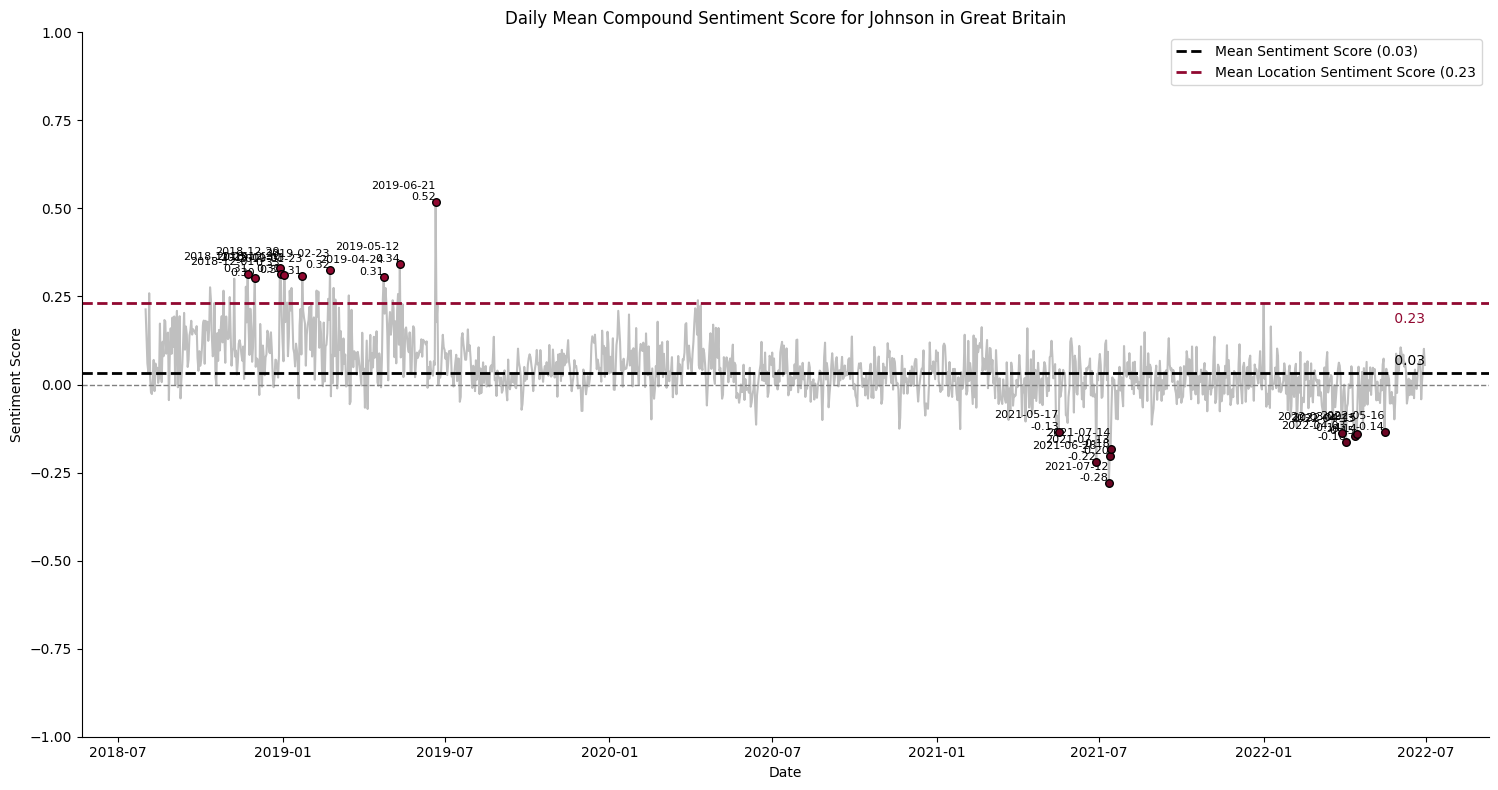

Top Points:
Date: 2019-06-21, Sentiment: 0.52
Date: 2019-05-12, Sentiment: 0.34
Date: 2018-12-29, Sentiment: 0.33
Date: 2019-02-23, Sentiment: 0.32
Date: 2018-12-30, Sentiment: 0.31
Date: 2018-11-23, Sentiment: 0.31
Date: 2019-01-03, Sentiment: 0.31
Date: 2019-01-23, Sentiment: 0.31
Date: 2019-04-24, Sentiment: 0.31
Date: 2018-12-01, Sentiment: 0.30

Bottom Points:
Date: 2021-07-12, Sentiment: -0.28
Date: 2021-06-28, Sentiment: -0.22
Date: 2021-07-13, Sentiment: -0.20
Date: 2021-07-14, Sentiment: -0.18
Date: 2022-04-03, Sentiment: -0.16
Date: 2022-04-13, Sentiment: -0.15
Date: 2022-04-15, Sentiment: -0.14
Date: 2022-03-29, Sentiment: -0.14
Date: 2022-05-16, Sentiment: -0.14
Date: 2021-05-17, Sentiment: -0.13


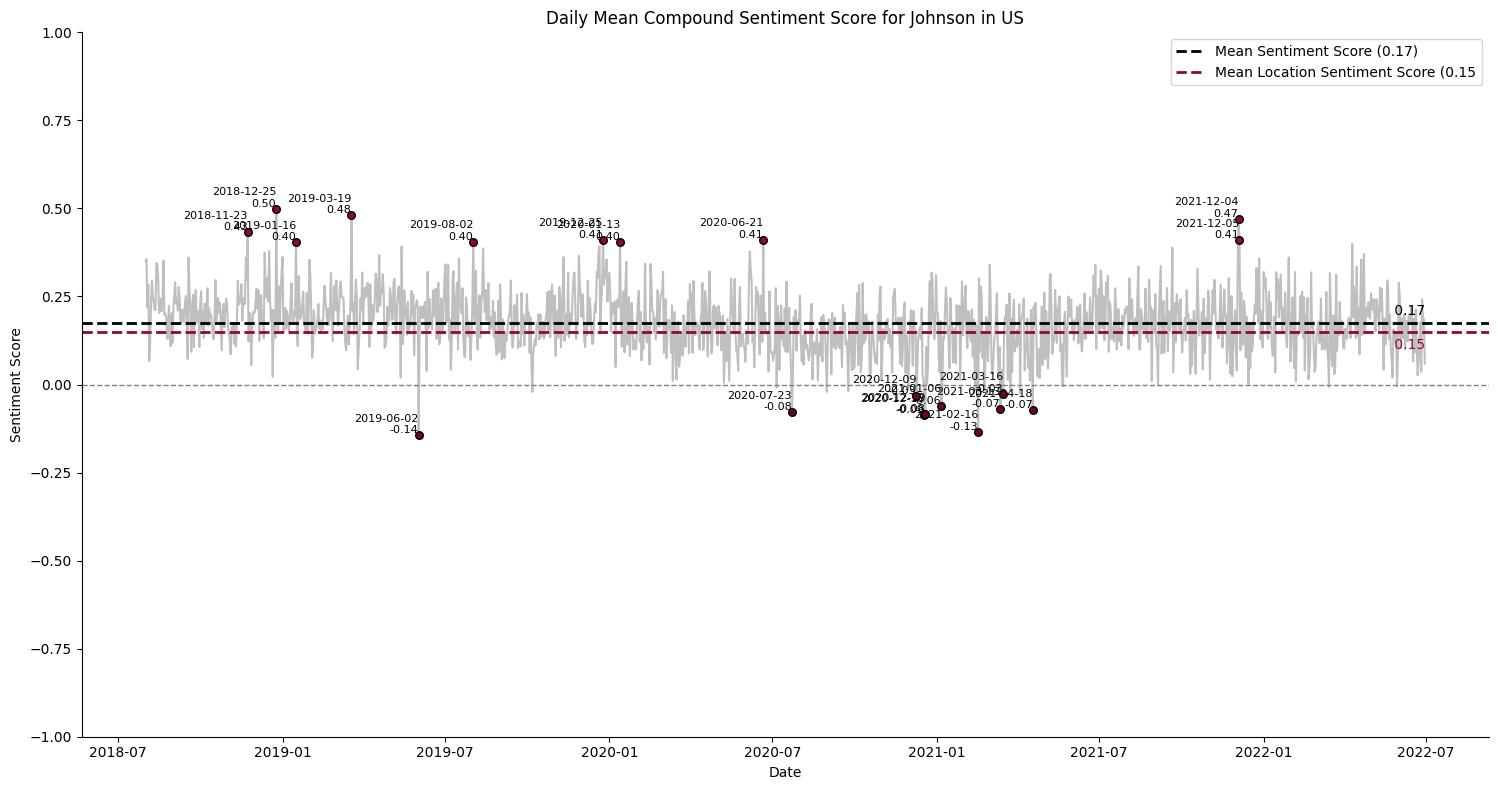

Top Points:
Date: 2018-12-25, Sentiment: 0.50
Date: 2019-03-19, Sentiment: 0.48
Date: 2021-12-04, Sentiment: 0.47
Date: 2018-11-23, Sentiment: 0.43
Date: 2019-12-25, Sentiment: 0.41
Date: 2020-06-21, Sentiment: 0.41
Date: 2021-12-05, Sentiment: 0.41
Date: 2019-08-02, Sentiment: 0.40
Date: 2020-01-13, Sentiment: 0.40
Date: 2019-01-16, Sentiment: 0.40

Bottom Points:
Date: 2019-06-02, Sentiment: -0.14
Date: 2021-02-16, Sentiment: -0.13
Date: 2020-12-18, Sentiment: -0.09
Date: 2020-12-19, Sentiment: -0.08
Date: 2020-07-23, Sentiment: -0.08
Date: 2021-04-18, Sentiment: -0.07
Date: 2021-03-13, Sentiment: -0.07
Date: 2021-01-06, Sentiment: -0.06
Date: 2020-12-09, Sentiment: -0.03
Date: 2021-03-16, Sentiment: -0.03


In [5]:
for president in presidents:
    # get sentiment development regardless of location
    data = pd.read_pickle(f'{data_path}{president}.pkl')
    data, daily_sentiment = add_day_and_get_daily_sentiment(data)
    average_compound = get_compound_mean(data)
    top_points, bottom_points = plot_sentiment_with_highlights_and_timeframes(daily_sentiment,
                                            title = f'Daily Mean Compound Sentiment Score for {president.capitalize()}',
                                            colors=colors,
                                            average_compound=average_compound,
                                            mean_location=mean_compound.at['All','Total'],
                                            save_path=f'visualizations/compound_sentiment/outliers/{president}.png')
    print_outliers(top_points, bottom_points)
    # get location-specific sentiment development
    for location in (cities + countries):
        data = pd.read_pickle(f'{data_path}{president}-{location}.pkl')
        data, daily_sentiment = add_day_and_get_daily_sentiment(data)
        average_compound = get_compound_mean(data)
        top_points, bottom_points = plot_sentiment_with_highlights_and_timeframes(daily_sentiment,
                                                title = f'Daily Mean Compound Sentiment Score for {president.capitalize()} in {location}',
                                                colors=colors,
                                                average_compound=average_compound,
                                                mean_location=mean_compound.at['All',location],
                                                save_path=f'visualizations/compound_sentiment/outliers/{president}-{location}.png')
        print_outliers(top_points, bottom_points)

Here a version without the outliers for better visibility.

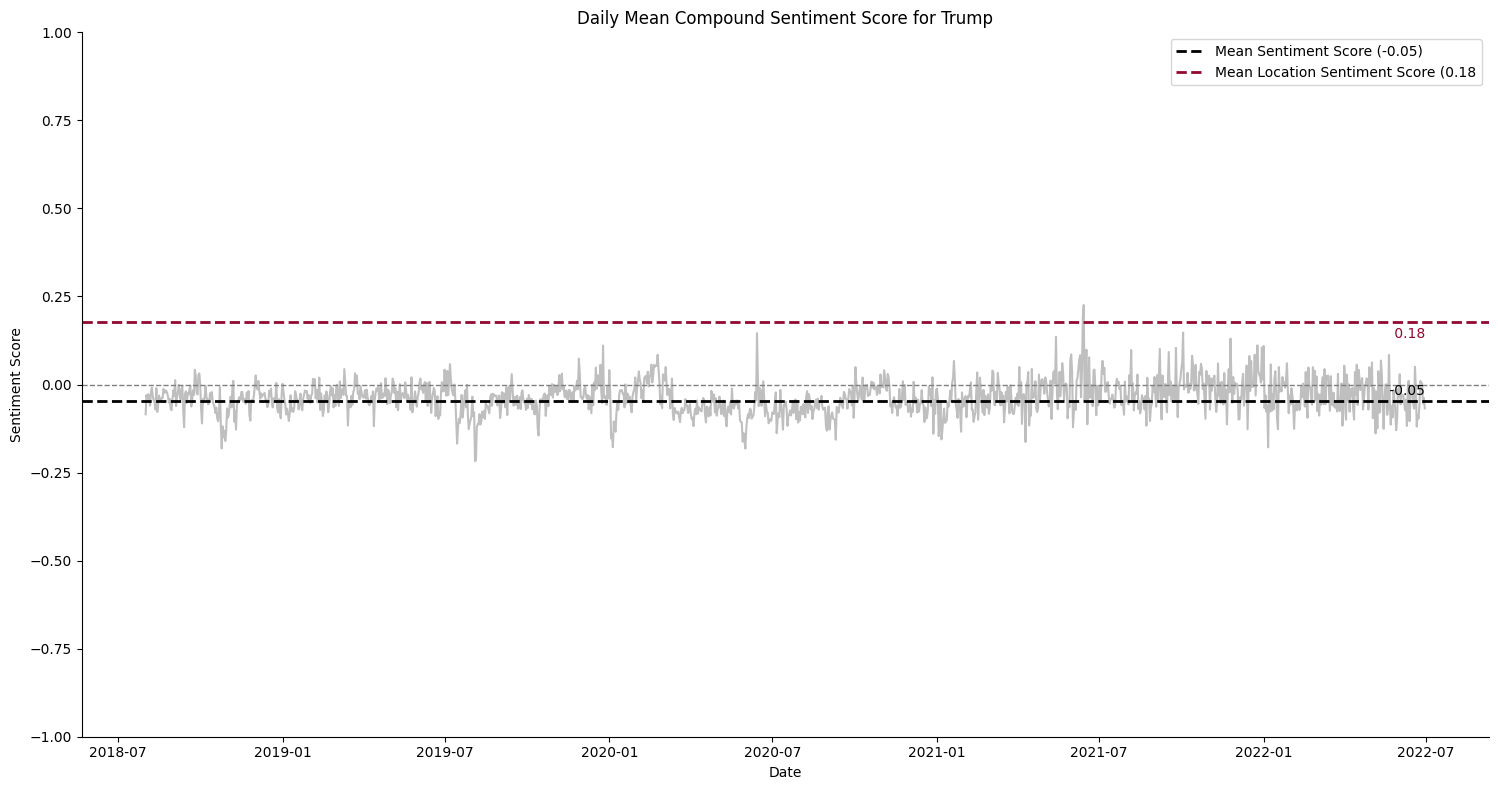

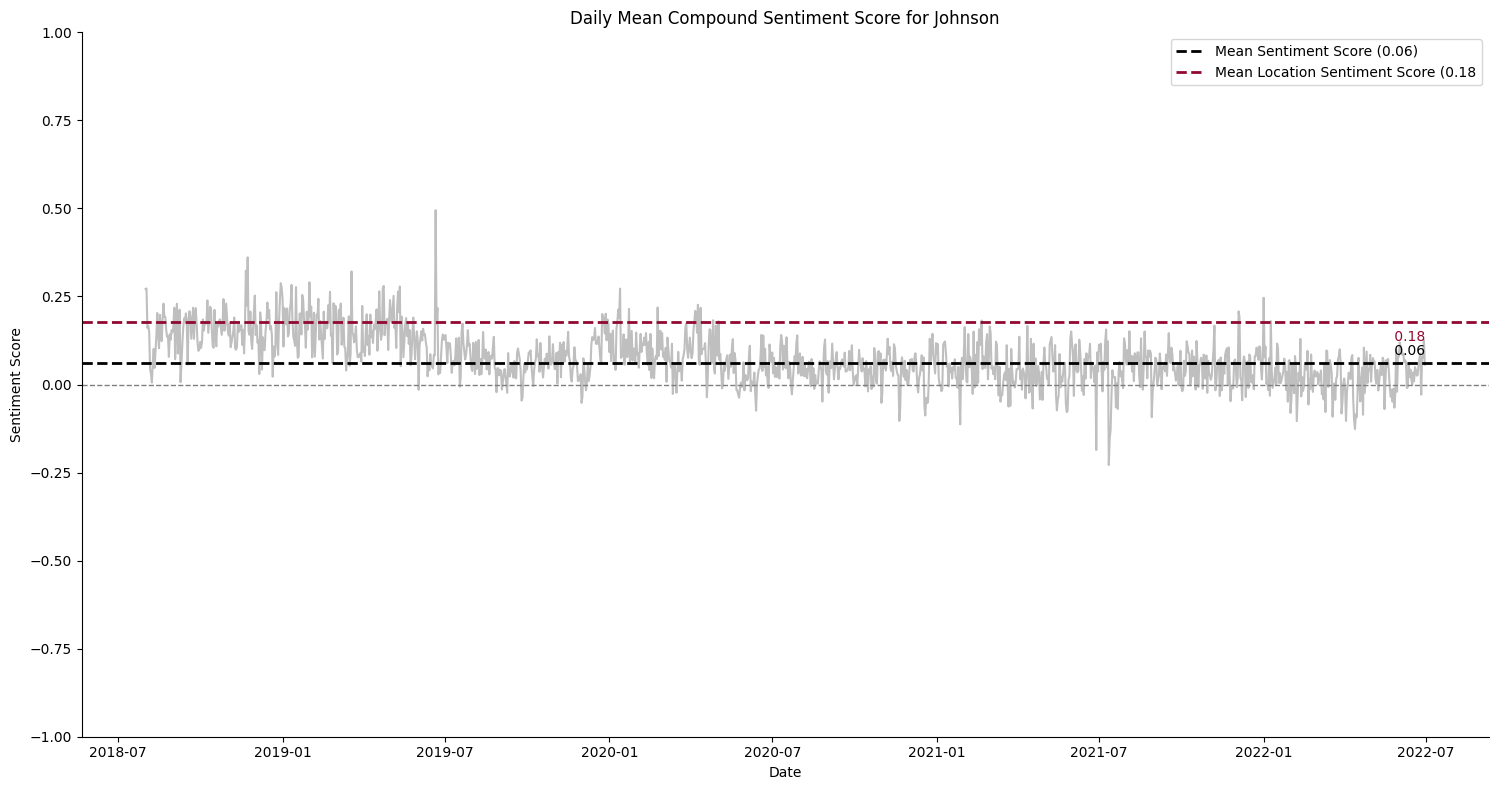

In [28]:
for president in presidents:
    # get sentiment development regardless of location
    data = pd.read_pickle(f'{data_path}{president}.pkl')
    data, daily_sentiment = add_day_and_get_daily_sentiment(data)
    average_compound = get_compound_mean(data)
    top_points, bottom_points = plot_sentiment_with_highlights_and_timeframes(daily_sentiment,
                                            title = f'Daily Mean Compound Sentiment Score for {president.capitalize()}',
                                            colors=colors,
                                            average_compound=average_compound,
                                            mean_location=mean_compound.at['All','Total'],
                                            num_top_points=0, 
                                            num_bottom_points=0,
                                            save_path=f'visualizations/compound_sentiment/{president}.png')

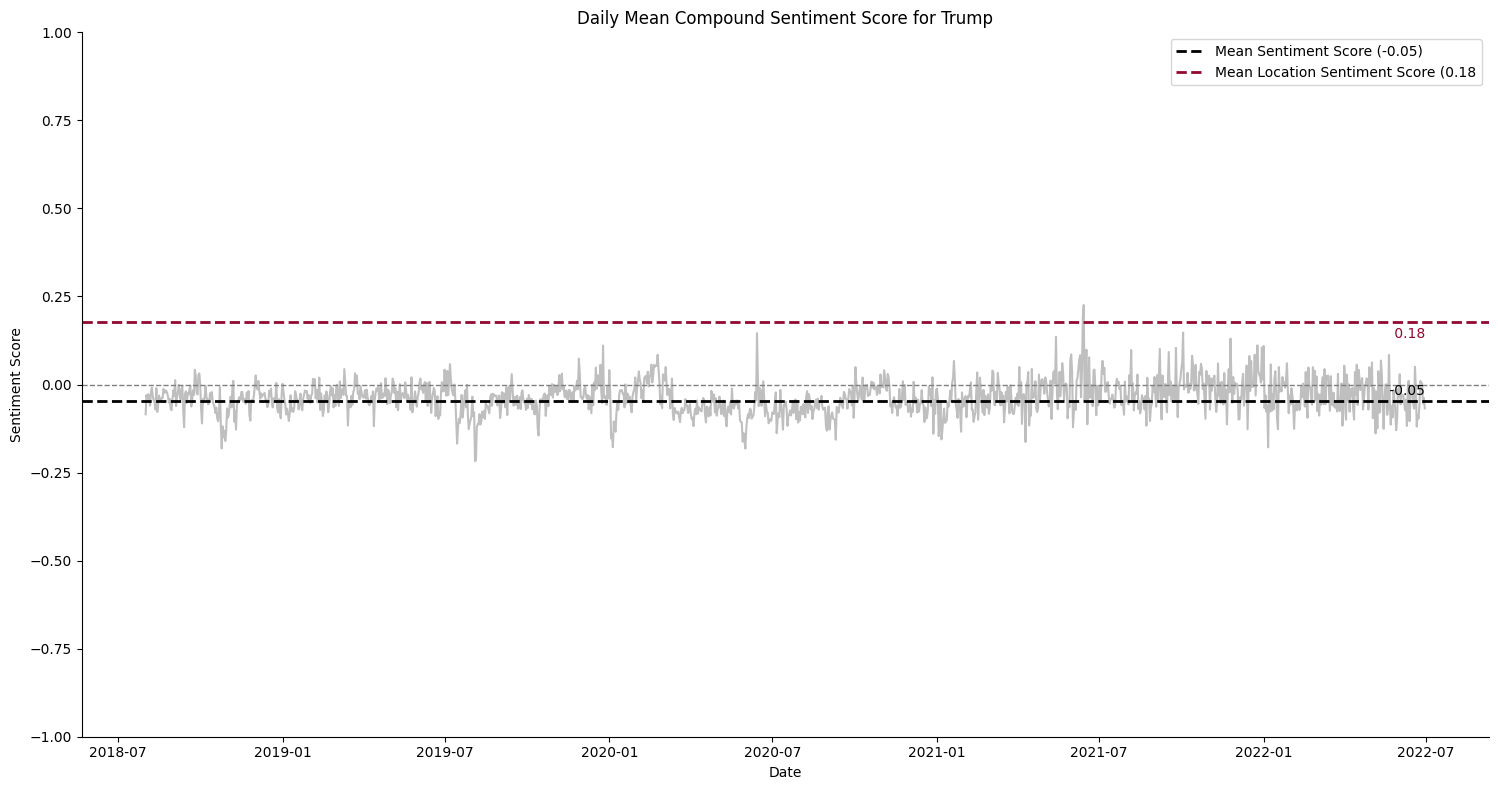

Top Points:

Bottom Points:


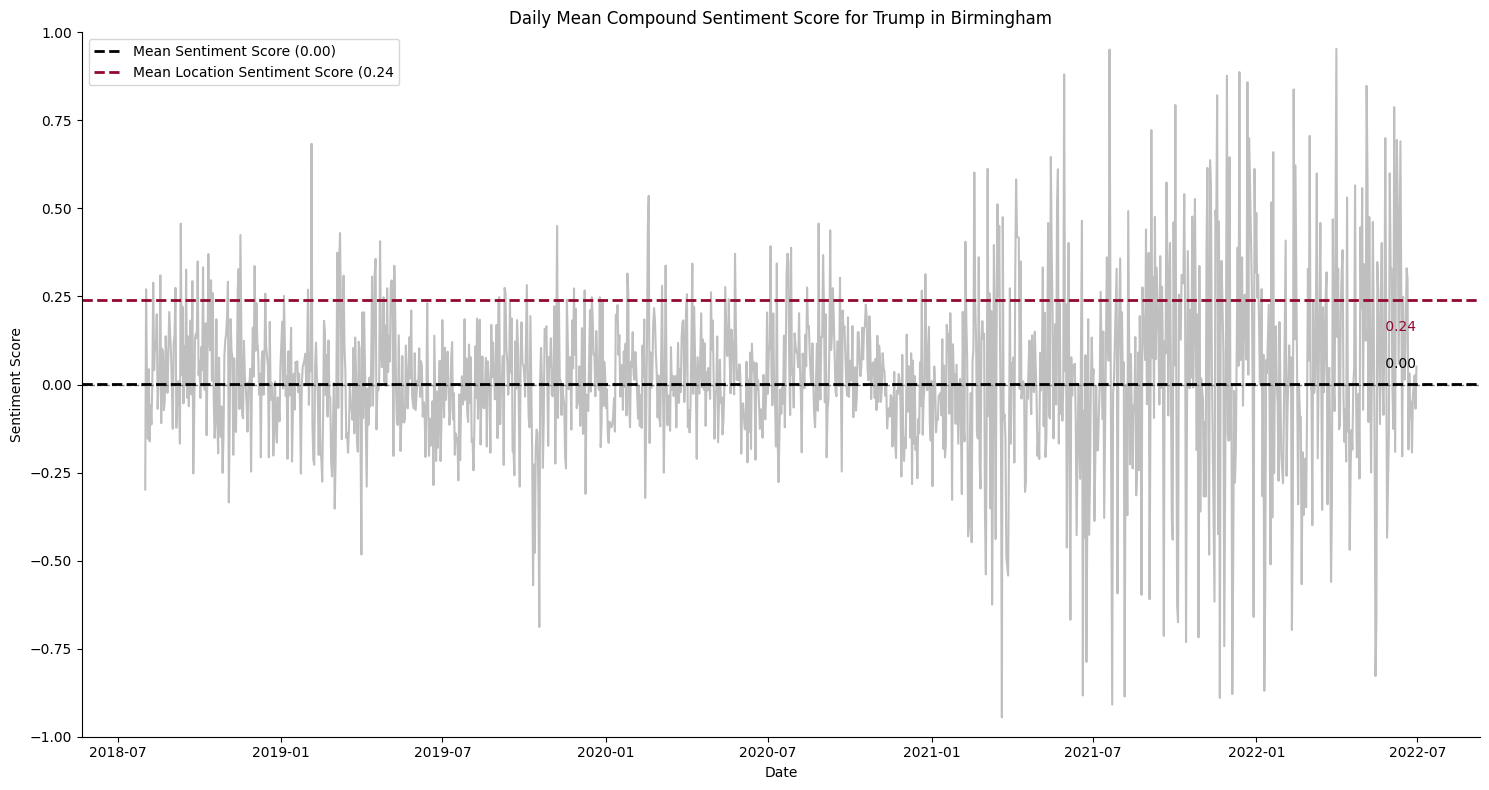

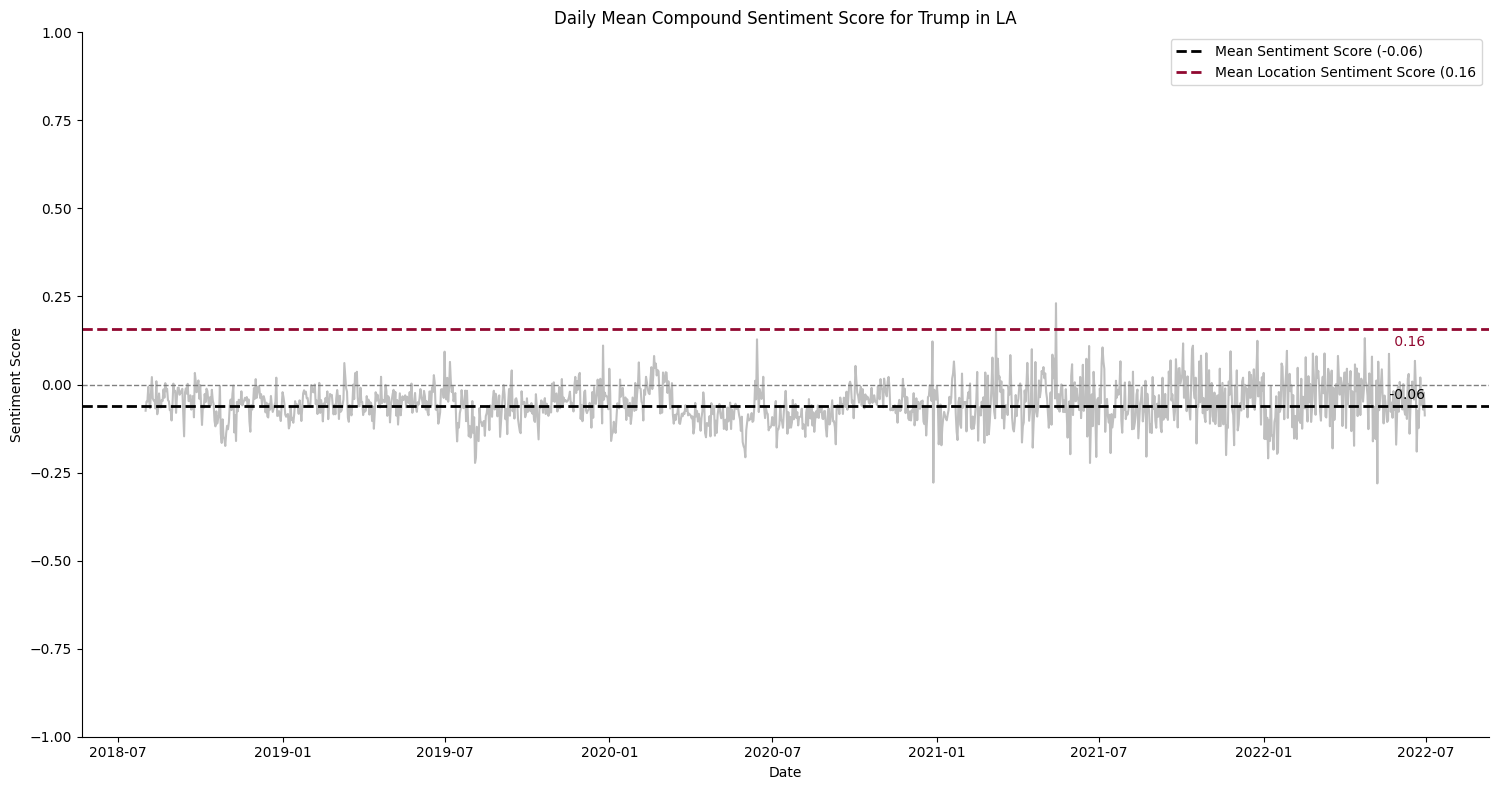

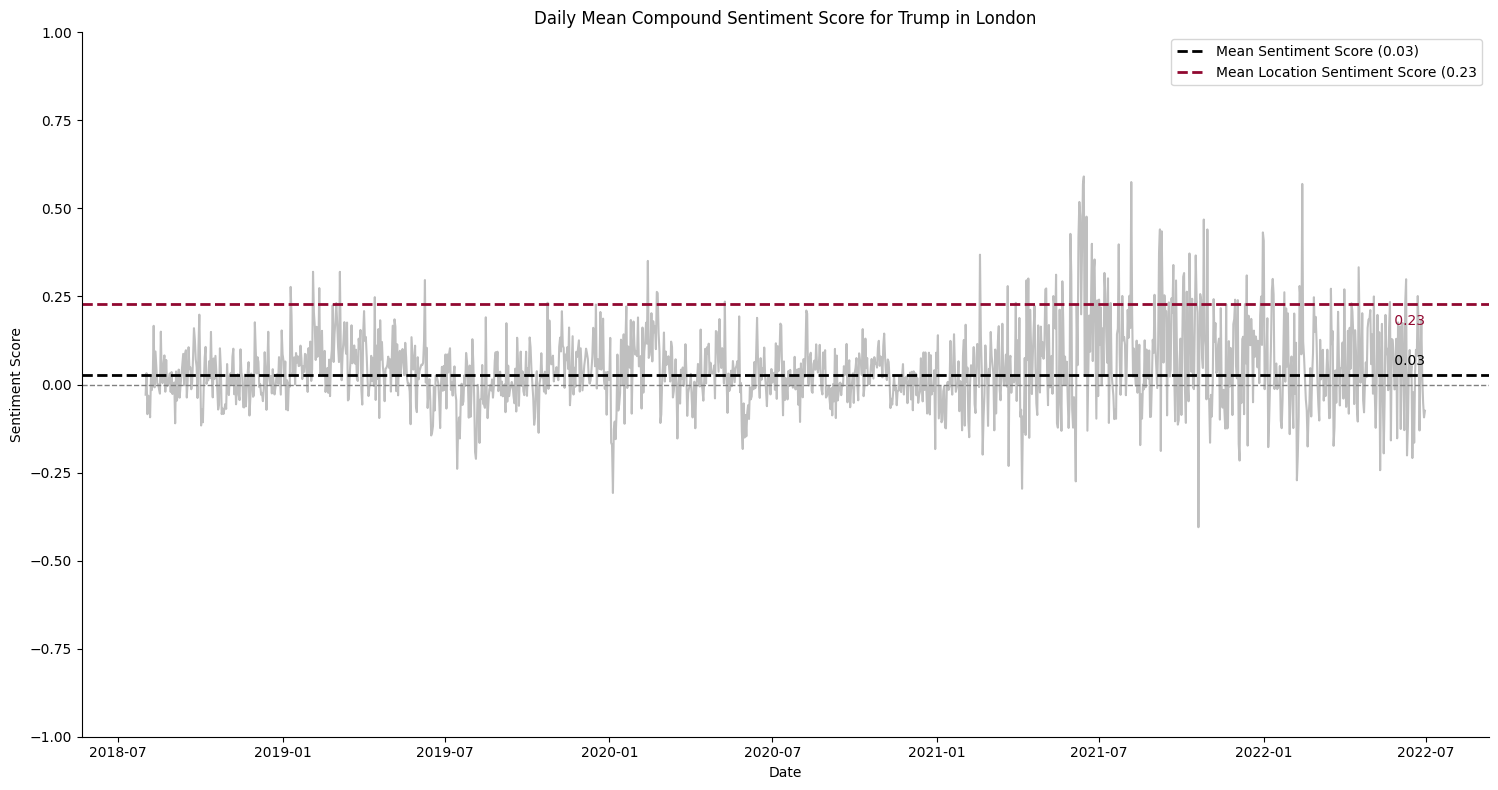

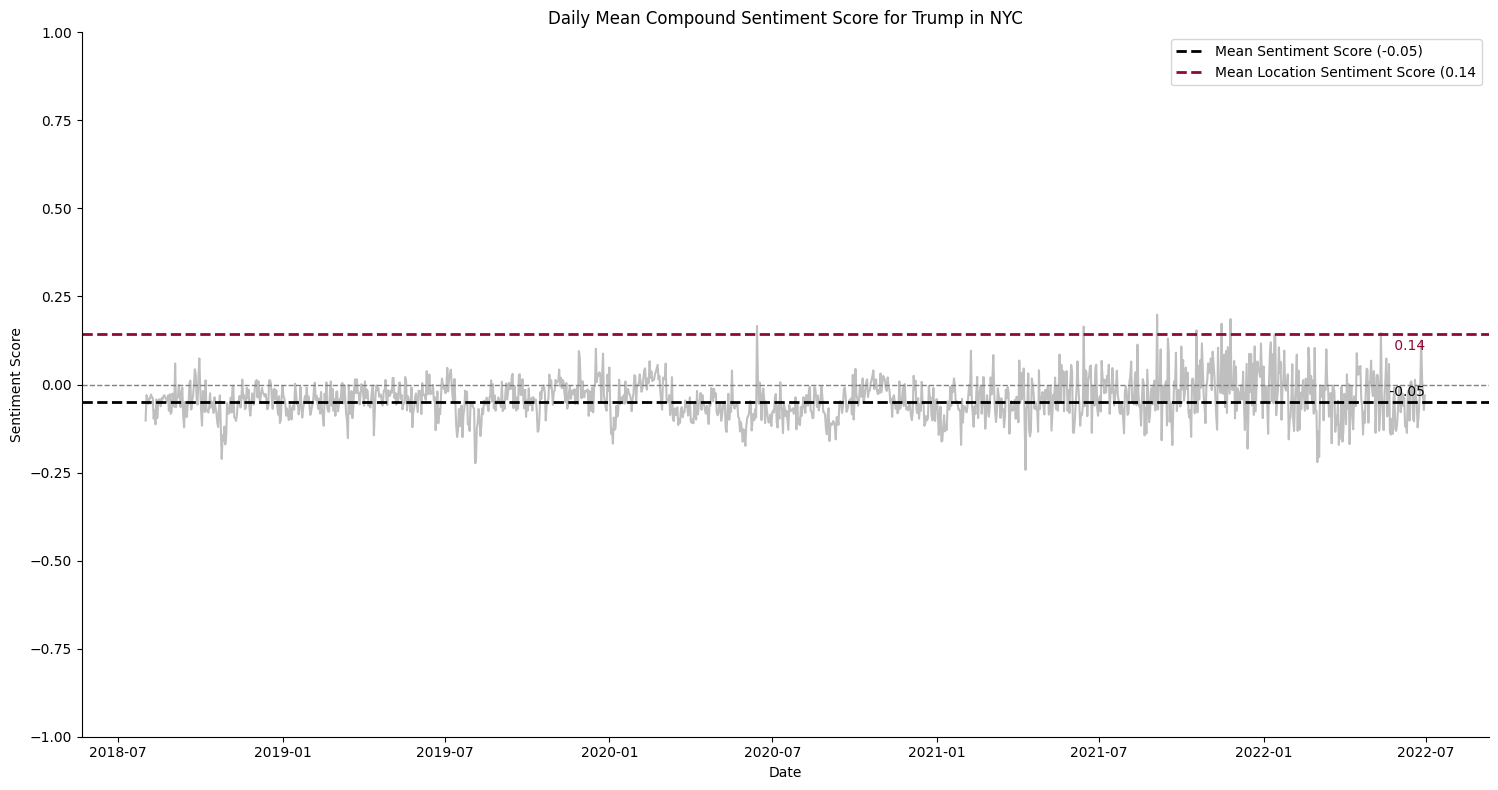

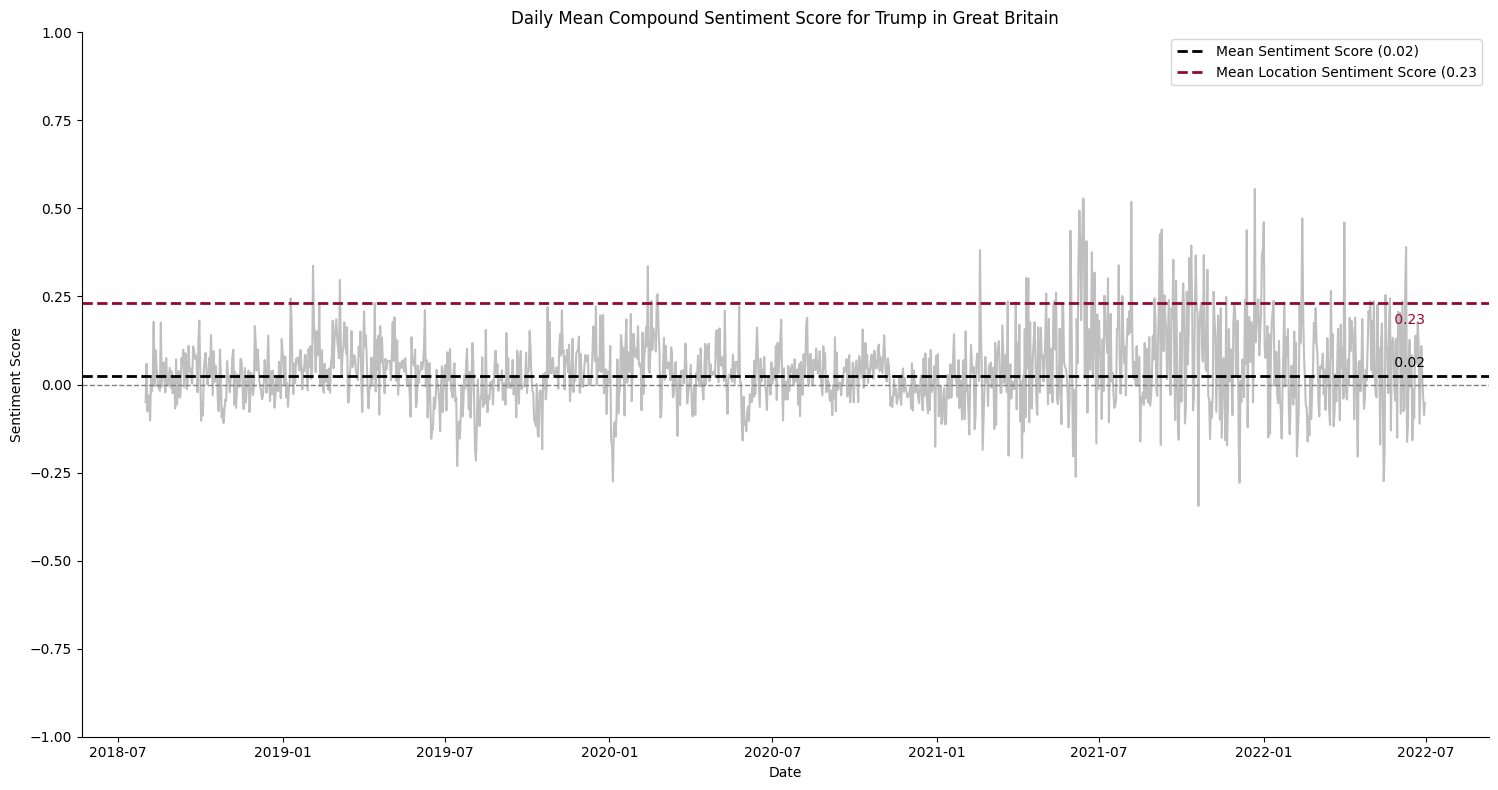

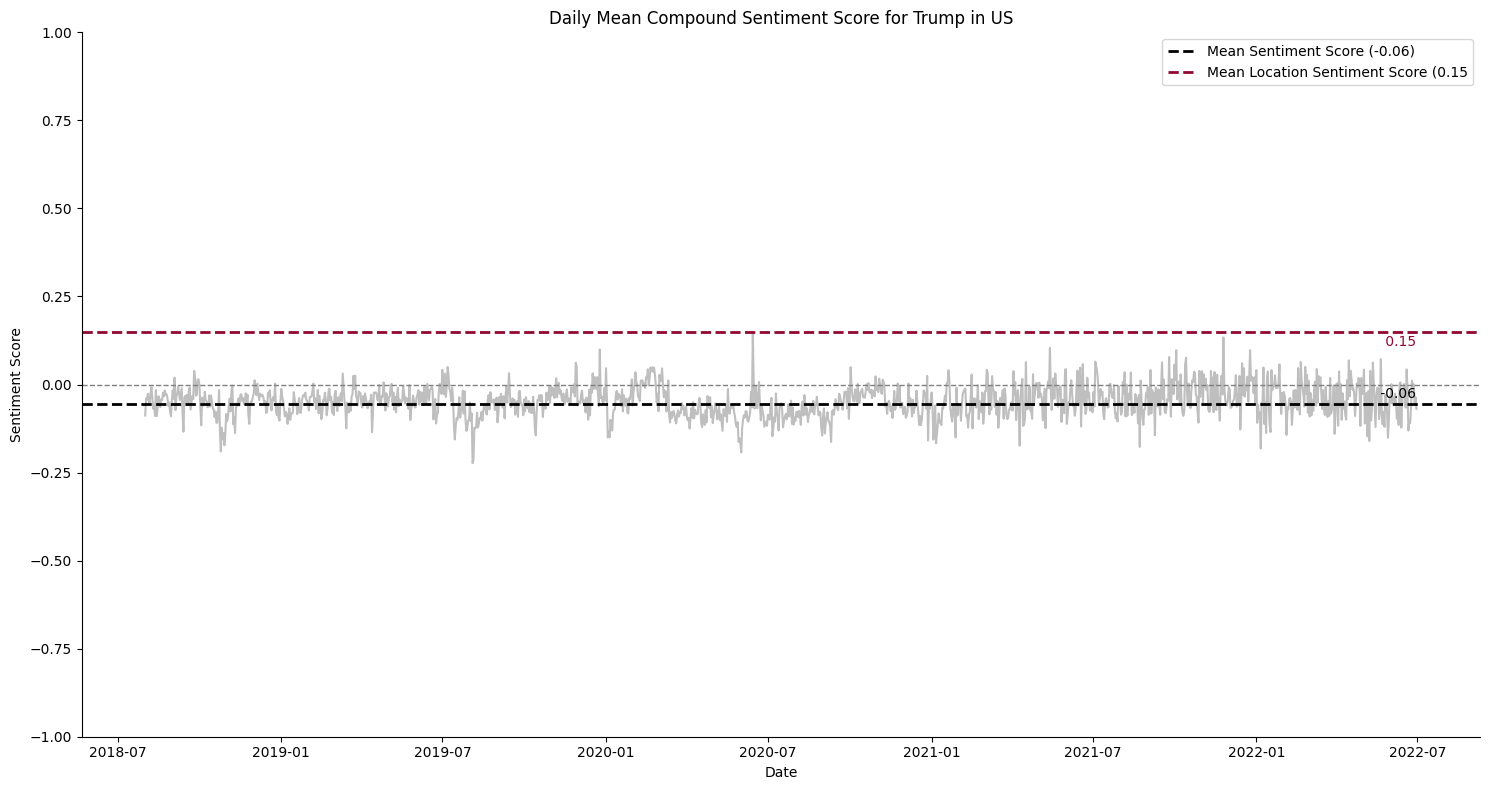

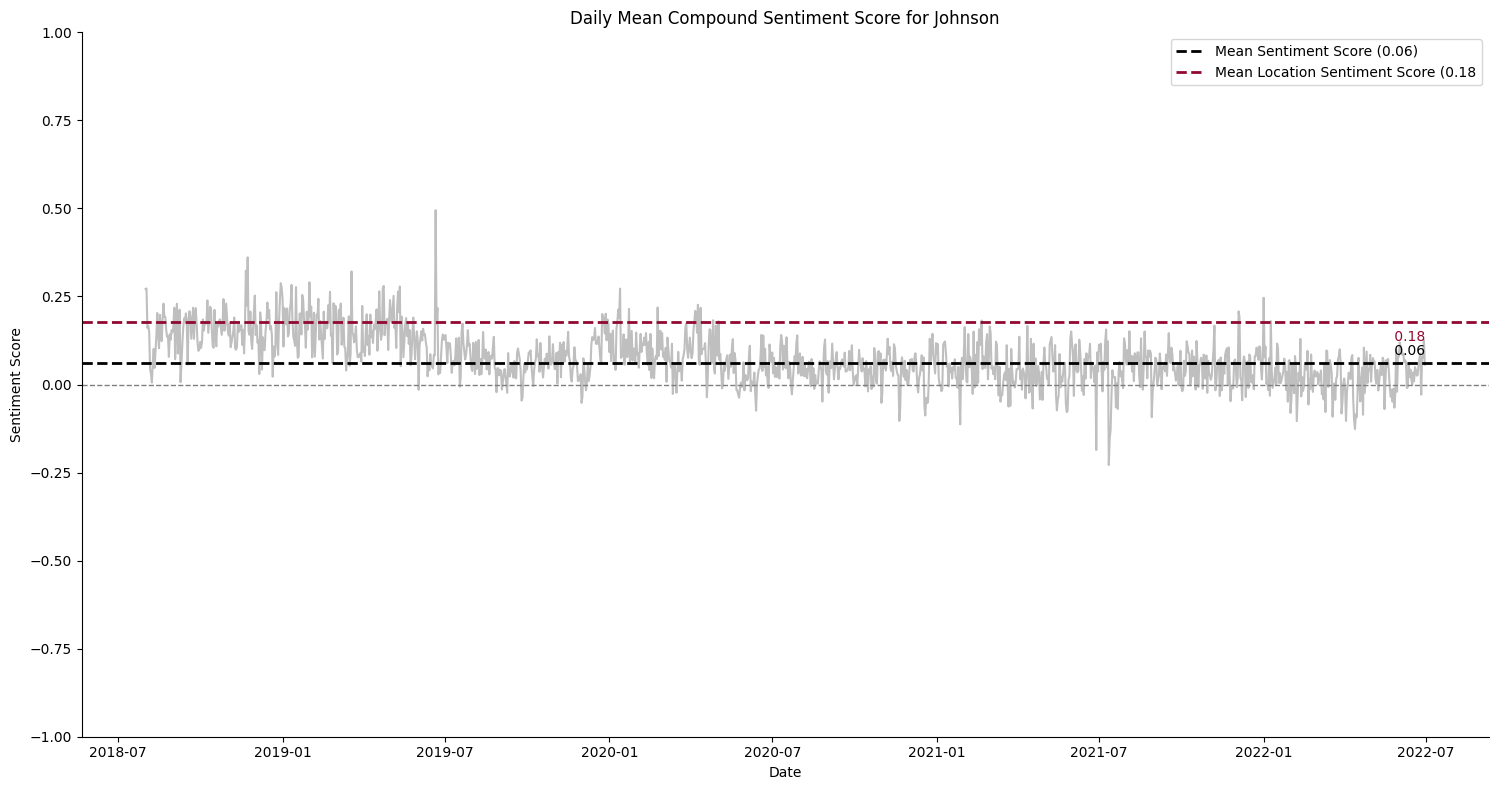

Top Points:

Bottom Points:


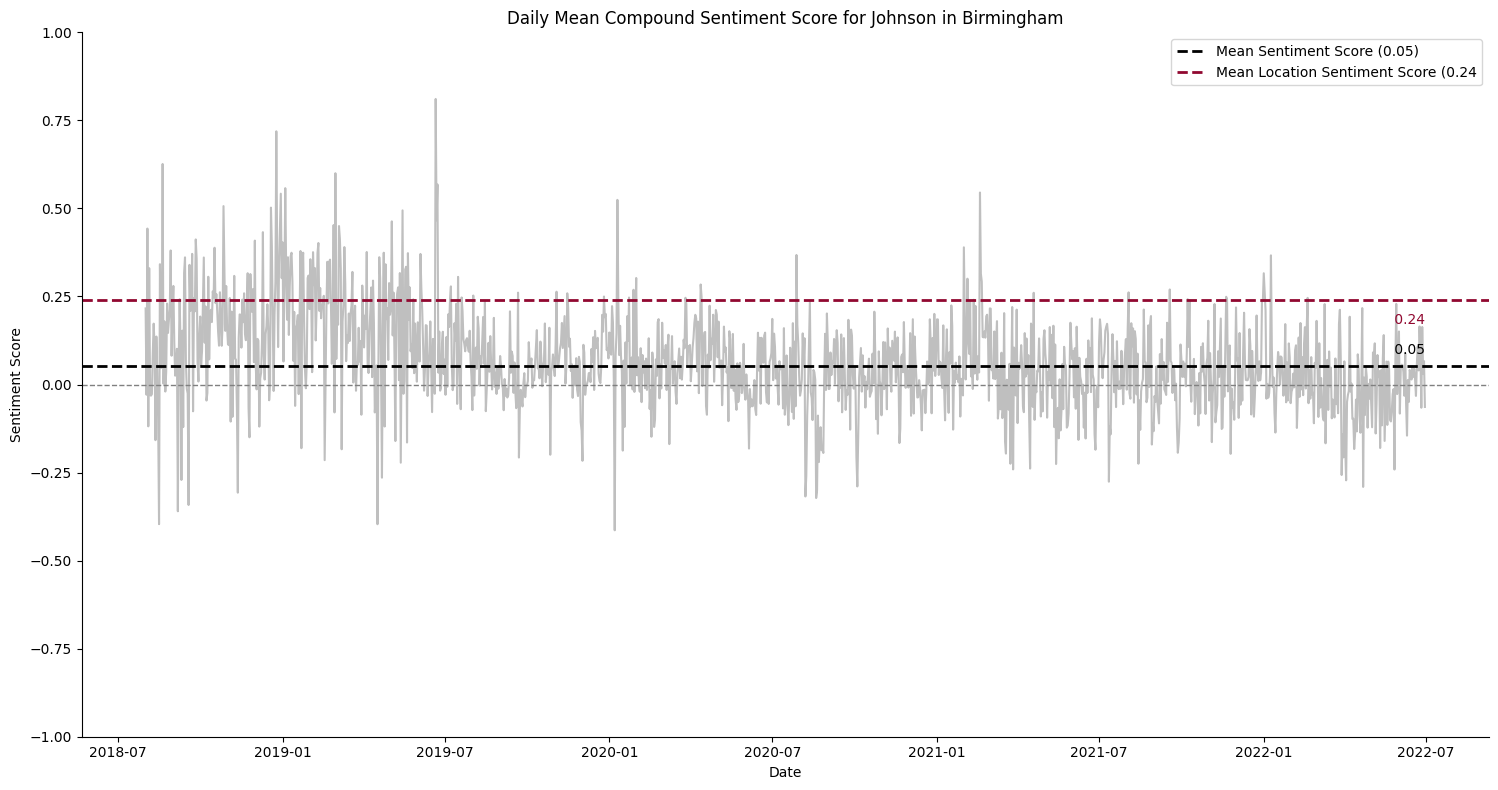

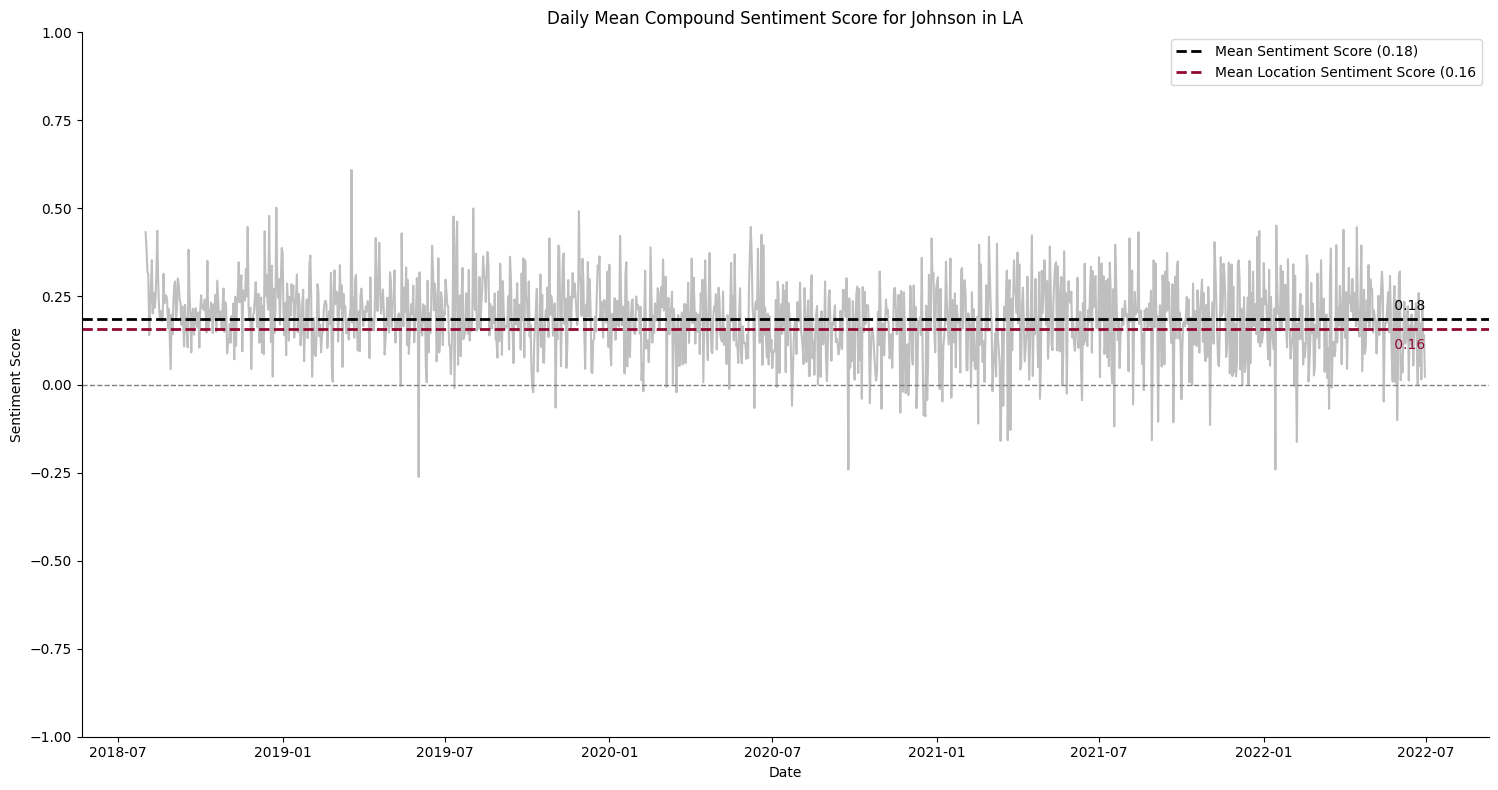

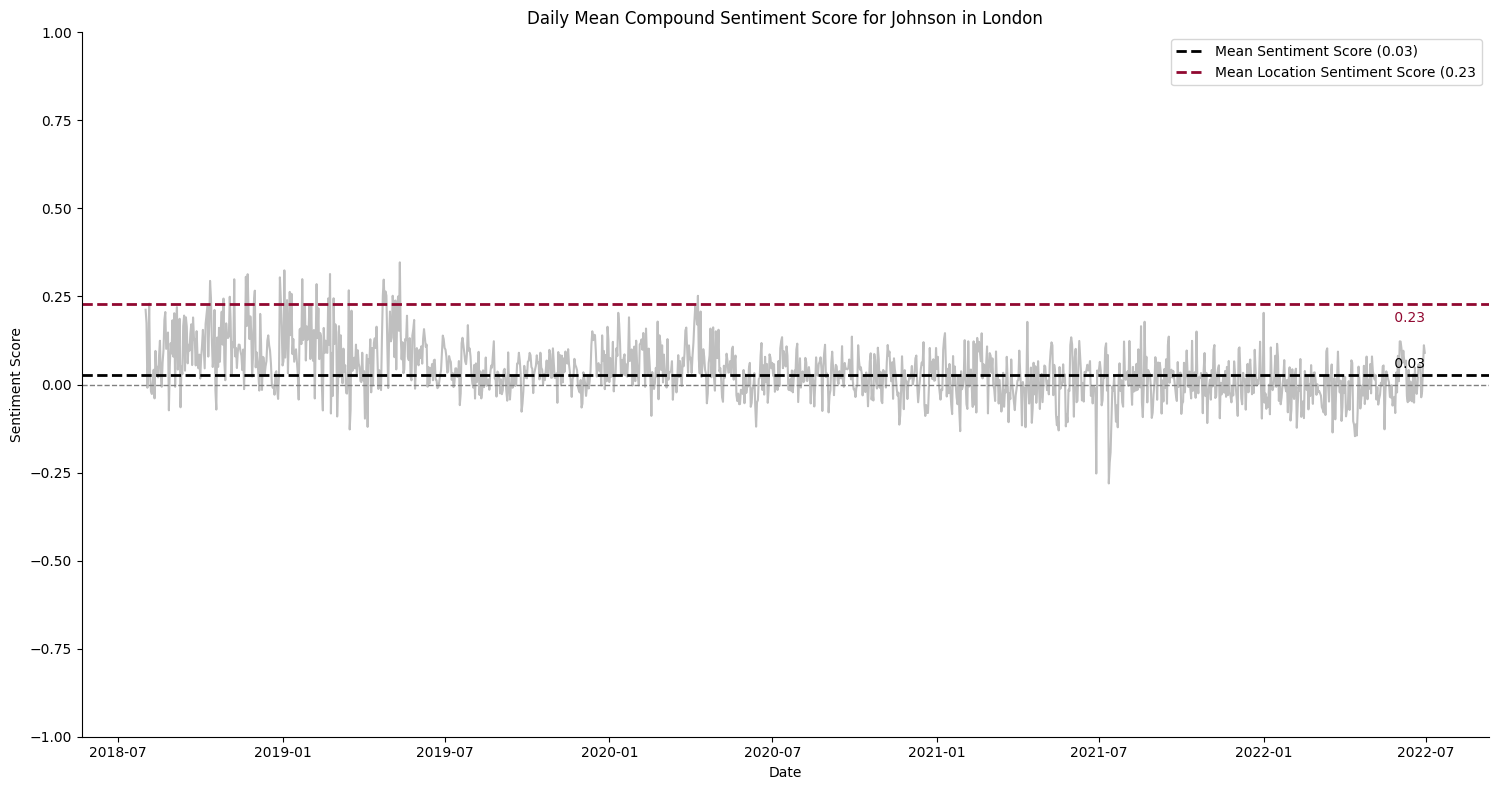

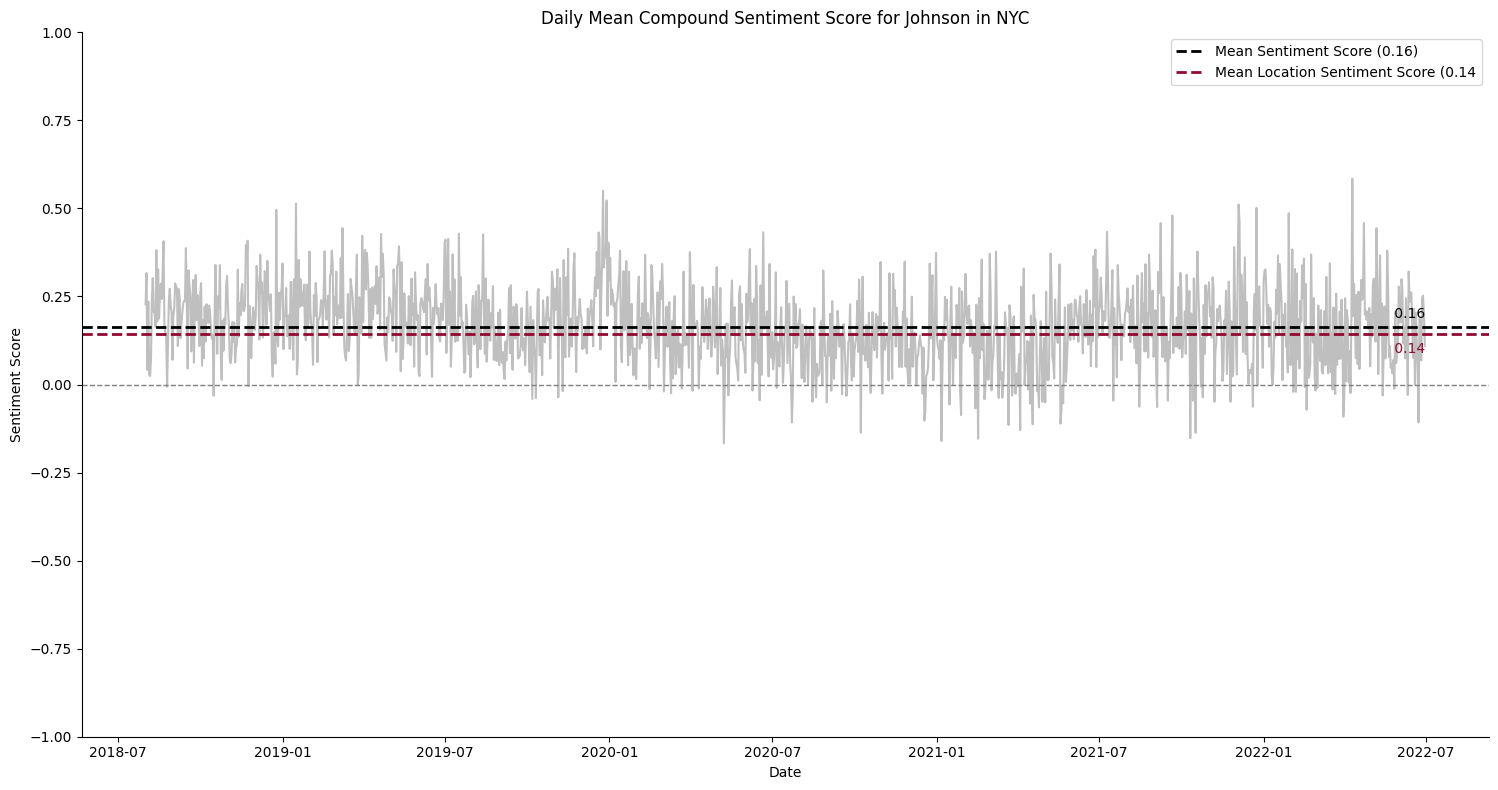

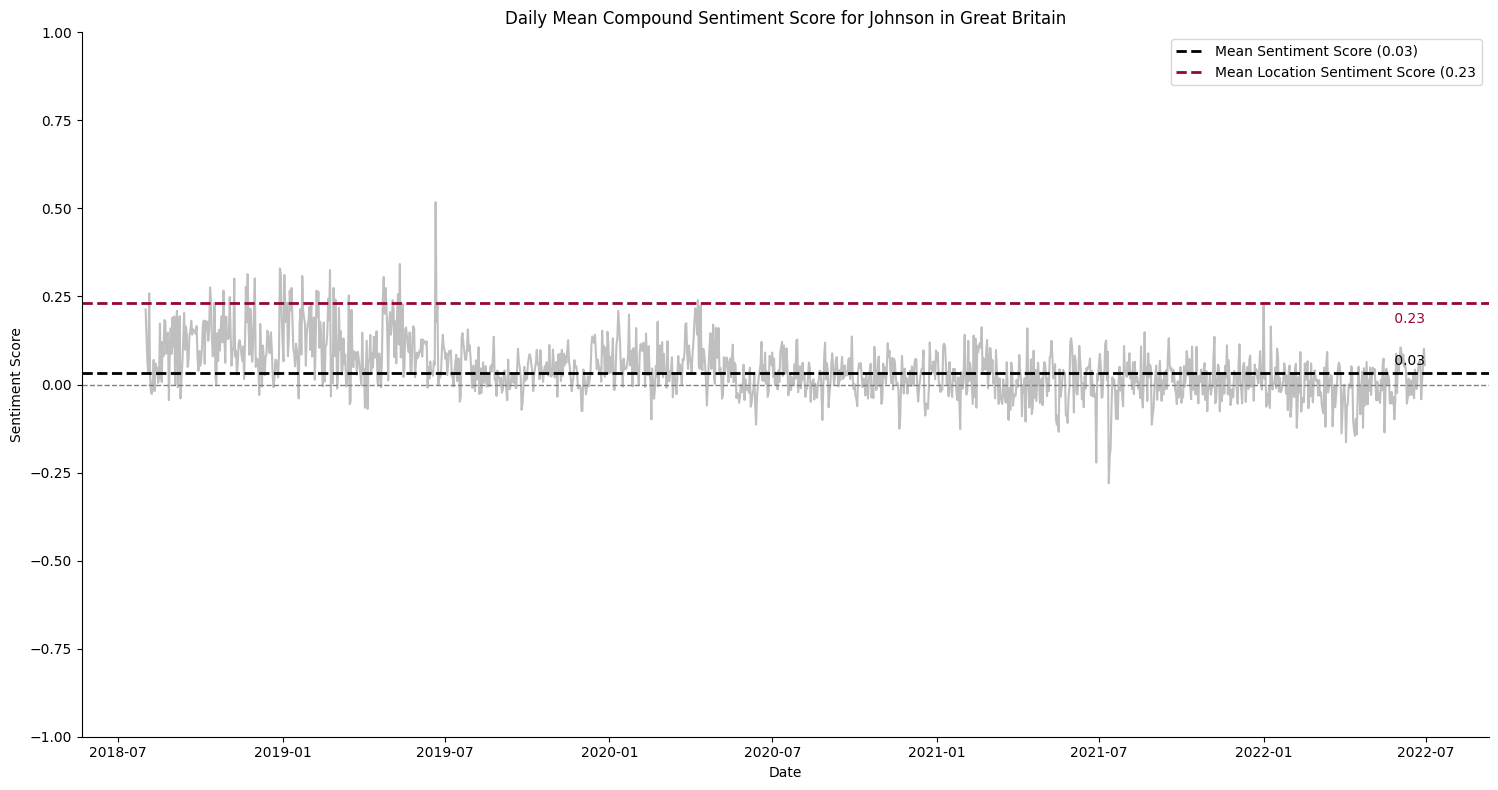

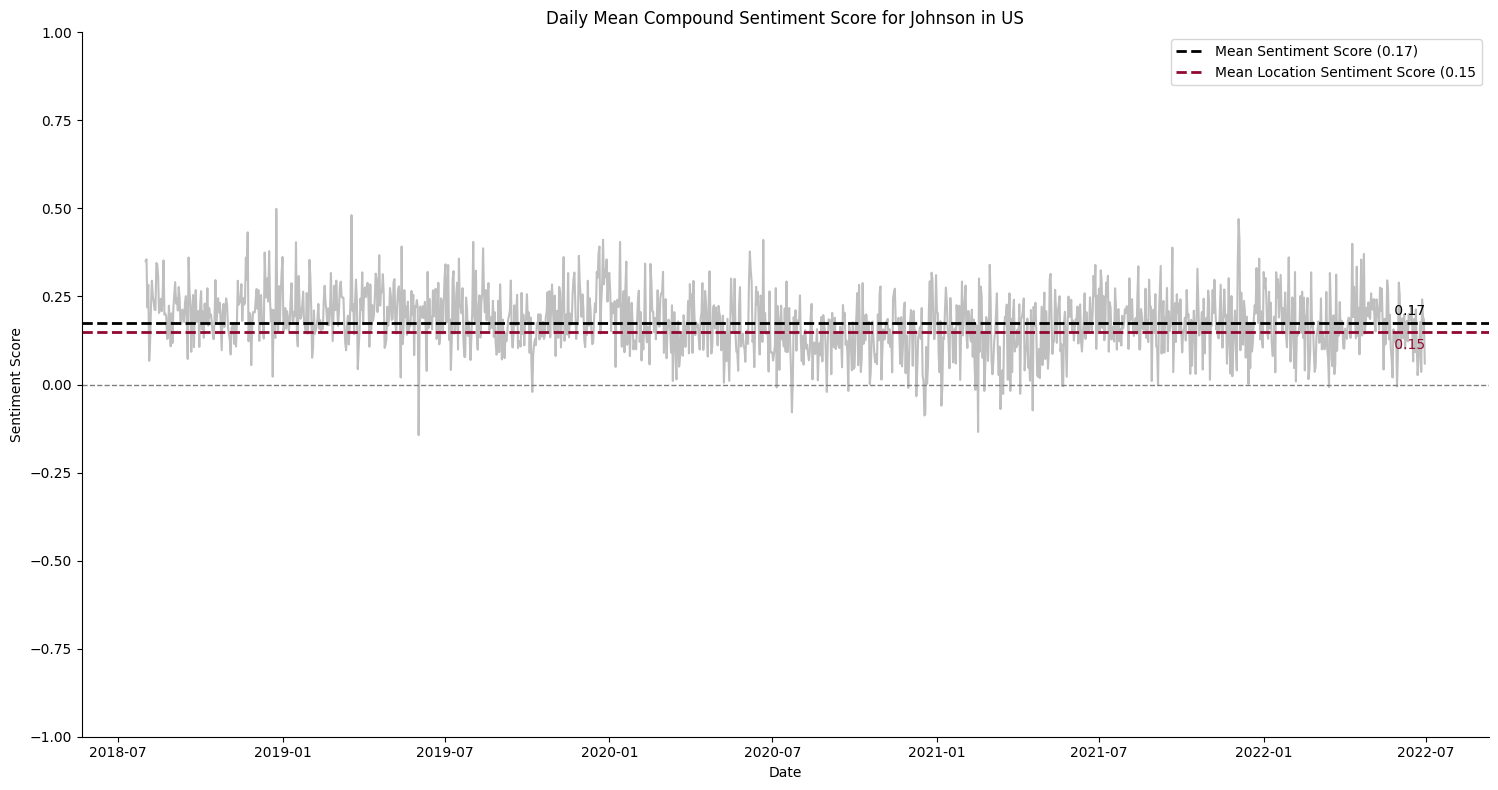

In [29]:
for president in presidents:
    # get sentiment development regardless of location
    data = pd.read_pickle(f'{data_path}{president}.pkl')
    data, daily_sentiment = add_day_and_get_daily_sentiment(data)
    average_compound = get_compound_mean(data)
    top_points, bottom_points = plot_sentiment_with_highlights_and_timeframes(daily_sentiment,
                                            title = f'Daily Mean Compound Sentiment Score for {president.capitalize()}',
                                            colors=colors,
                                            average_compound=average_compound,
                                            mean_location=mean_compound.at['All','Total'],
                                            num_top_points=0, 
                                            num_bottom_points=0,
                                            save_path=f'visualizations/compound_sentiment/{president}.png')
    print_outliers(top_points, bottom_points)
    # get location-specific sentiment development
    for location in (cities + countries):
        title = f'Daily Mean Compound Sentiment Score for {president.capitalize()} in {location}'
        filepath = f'{data_path}{president}-{location}.pkl'
        data = pd.read_pickle(filepath)
        data, daily_sentiment = add_day_and_get_daily_sentiment(data)
        average_compound = get_compound_mean(data)
        plot_sentiment_with_highlights_and_timeframes(daily_sentiment,
                                                title,
                                                colors=colors,
                                                average_compound=average_compound,
                                                mean_location=mean_compound.at['All',location],
                                                num_top_points=0, 
                                                num_bottom_points=0,
                                                save_path=f'visualizations/compound_sentiment/{president}-{location}.png')

##### Data Inspection

In [ ]:
# load data
trump, trump_daily_sentiment = add_day_and_get_daily_sentiment(pd.read_pickle(f'{data_path}trump.pkl'))
johnson, johnson_daily_sentiment = add_day_and_get_daily_sentiment(pd.read_pickle(f'{data_path}johnson.pkl'))

# remove redundant cols
cols = list(trump.columns)
elements_to_remove = ['Compound', 'day']
for element in elements_to_remove:
    cols.remove(element)
trump = trump.drop(columns=cols)
johnson = johnson.drop(columns=cols)

In [286]:
def get_mean_sentiment(data, date=None, type=None, start_date=None, end_date=None):
    # if single day
    if date:
        date = pd.Timestamp(date)
        subset = data[data['day'] == date]
        mean = subset.iloc[:, 0].mean()  # Assuming the sentiment score is in the first column
    # if timespan
    elif start_date and end_date:
        data['day'] = pd.to_datetime(data['day'])  # Convert 'day' column to Timestamp objects
        start_date = pd.Timestamp(start_date)
        end_date = pd.Timestamp(end_date)
        timespan = data[(data['day'] >= start_date) & (data['day'] <= end_date)]
        mean = timespan['Compound'].mean()
    print(f'{type} CSS {round(mean, 2)}')

In [287]:
get_mean_sentiment(johnson, '2020-05-10', 'Covid Statement')
get_mean_sentiment(johnson, '2020-10-31', 'Covid Statement')
get_mean_sentiment(johnson, '2020-04-06', 'Covid Hospitalization')

Covid Statement CSS 0.06
Covid Statement CSS -0.05
Covid Hospitalization CSS 0.21


In [291]:
# overall sentiment score
get_mean_sentiment(trump, start_date='2017-01-20', end_date='2021-01-20', type="Trump's Presidency")
get_mean_sentiment(trump, start_date='2021-01-21', end_date='2023-01-01', type="After Trump's Presidency")
get_mean_sentiment(johnson, start_date='2017-01-01', end_date='2019-07-23', type="Before Johnson's Term")
get_mean_sentiment(johnson, start_date='2019-07-24', end_date='2022-09-06', type="Johnson's Term")

Trump's Presidency CSS -0.05
After Trump's Presidency CSS -0.03
Before Johnson's Term CSS 0.13
Johnson's Term CSS 0.05


In [290]:
# sentiment score in each country
for president in presidents:
    for location in countries:
        print('\n', location)
        data, _ = add_day_and_get_daily_sentiment(pd.read_pickle(f'{data_path}{president}-{location}.pkl'))
        if president == 'trump':
            get_mean_sentiment(data, start_date='2017-01-20', end_date='2021-01-20', type="Trump's Presidency")
            get_mean_sentiment(data, start_date='2021-01-21', end_date='2023-01-01', type="After Trump's Presidency")
        else:
            get_mean_sentiment(data, start_date='2017-01-01', end_date='2019-07-23', type="Before Johnson's Term")
            get_mean_sentiment(data, start_date='2019-07-24', end_date='2022-09-06', type="Johnson's Term")


 Great Britain
Trump's Presidency CSS 0.02
After Trump's Presidency CSS 0.07

 US
Trump's Presidency CSS -0.06
After Trump's Presidency CSS -0.04

 Great Britain
Before Johnson's Term CSS 0.09
Johnson's Term CSS 0.02

 US
Before Johnson's Term CSS 0.21
Johnson's Term CSS 0.16


# Aggregated Post Count

1. Data Aggregation: Aggregate the data into daily counts with `aggregate_tweet_count()`
2. Data Visualization
3. Normalize Daily Post Count
4. Inspect Post Counts

##### Data Aggregation

In [11]:
def aggregate_daily_counts(df, date_column='day'):
    """
    Aggregate the total count of rows for each day in a dataframe.

    Parameters:
    df (DataFrame): The original dataframe with a 'day' column.
    date_column (str): The name of the column containing the dates. Defaults to 'day'.

    Returns:
    DataFrame: A new dataframe with columns 'day' and 'tweet_count', representing the count of rows per day.
    """
    return df.groupby(date_column).size().reset_index(name='tweet_count')

def aggregate_tweet_count(president):
    daily_tweet_counts = pd.DataFrame(columns=['day', 'All'] + countries + cities)
    for location in countries + cities:
        # load data
        filepath = f'{data_path}{president}-{location}.pkl'
        data = pd.read_pickle(filepath)
        
        # add day
        data, _ = add_day_and_get_daily_sentiment(data)
        # aggregate day to get daily post count
        aggregated_data = aggregate_daily_counts(data)
        daily_tweet_counts[location] = aggregated_data['tweet_count']
    daily_tweet_counts['day'] = aggregated_data['day']
    daily_tweet_counts.set_index('day')
    # calculate 'All'
    filepath = f'{data_path}{president}.pkl'
    data = pd.read_pickle(filepath)
    data, _ = add_day_and_get_daily_sentiment(data)
    aggregated_data = aggregate_daily_counts(data)
    daily_tweet_counts['All'] = aggregated_data['tweet_count']
    return daily_tweet_counts

In [12]:
# aggregate daily tweets for both presidents
daily_tweet_counts_trump = aggregate_tweet_count(presidents[0])
daily_tweet_counts_johnson = aggregate_tweet_count(presidents[1])
# save data
daily_tweet_counts_trump.to_pickle(f'{data_path}daily_tweet_counts_trump.pkl')
daily_tweet_counts_johnson.to_pickle(f'{data_path}daily_tweet_counts_johnson.pkl')

Save the numer of days for `get_mean_tweets_per_day()` in `./data_overview.ipynb`

In [13]:
import json
from get_mean_count import save_results
number_of_days = {"number_of_days": daily_tweet_counts_trump.shape[0]}
save_results(number_of_days, 'results/number_of_days.json')

Results saved to results/number_of_days.json


Inspect data to verify data quality

In [14]:
daily_tweet_counts_trump.head()

day   All  Great Britain    US  Birmingham    LA  London  NYC
0  2018-08-01  2069            191  1878        15.0   969     176  909
1  2018-08-02  1724            161  1563        18.0   736     143  827
2  2018-08-03  1400            146  1254        14.0   623     132  631
3  2018-08-04  2258            188  2070        18.0  1243     170  827
4  2018-08-05  1815            197  1618        27.0   807     170  811

In [15]:
daily_tweet_counts_johnson.head()

day  All  Great Britain  US  Birmingham  LA  London  NYC
0  2018-08-01  154             89  65          24  39      65   26
1  2018-08-02  149             57  92          10  53      47   39
2  2018-08-03  126             46  80           7  51      39   29
3  2018-08-04  125             59  66          12  41      47   25
4  2018-08-05  137             58  79          17  28      41   51

##### Data Visualization

In [16]:
def plot_daily_tweet_counts(post_counts, title, count_columns, colors=colors, timeframe=None, save_path=None, highlight_top_ten=None):
    """
    Plot the daily post counts for multiple series with a modern design, including options for highlights and timeframes. Highlights the top ten post counts for each series.

    Parameters:
    post_counts (DataFrame): Data containing the daily post counts with columns 'day' and multiple 'tweet_count_X' columns.
    title (str): The title of the plot.
    count_columns (list): List of column names containing the post counts to be plotted.
    colors (list, optional): Colors for the post count lines. If None, default colors will be used.
    timeframe (tuple of str/datetime, optional): A timeframe to highlight on the plot.
    save_path (str, optional): Path to save the figure.
    highlight_top_ten (bool, optional): Whether to highlight the top ten post counts.
    """
    plt.figure(figsize=(15, 8))
    
    if colors is None:
        colors = sns.color_palette('husl', len(count_columns))  # Generate as many colors as count columns
    
    # Plot each post count linedaily_tweet_counts_trump
    for i, count_column in enumerate(count_columns):
        sns.lineplot(x='day', y=count_column, data=post_counts, color=colors[i], label=count_column)
        
        if highlight_top_ten:
            # Sort the DataFrame by 'tweet_count' column in descending order and take the top ten
            top_ten_post_counts = post_counts.sort_values(by=count_column, ascending=False).head(10)
            # Highlight the top ten post counts
            for _, row in top_ten_post_counts.iterrows():
                point_datetime = pd.to_datetime(row['day'])
                tweet_count_at_point = row[count_column]
                plt.scatter(point_datetime, tweet_count_at_point, color=colors[i], s=50, zorder=5)
                # Adjusted text positioning
                text_x_position = point_datetime - pd.Timedelta(days=-10)  # Adjust as needed for your specific date format and plot
                plt.text(text_x_position, tweet_count_at_point, f"{row['day']}\n{tweet_count_at_point}", color='black', ha='left', va='bottom')

    # Highlight the timeframe
    if timeframe:
        plt.axvspan(pd.to_datetime(timeframe[0]), pd.to_datetime(timeframe[1]), color='yellow', alpha=0.3, label='Highlighted Period')

    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Post Count')
    sns.despine()
    plt.legend()
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, format='png', bbox_inches='tight')
    plt.show()

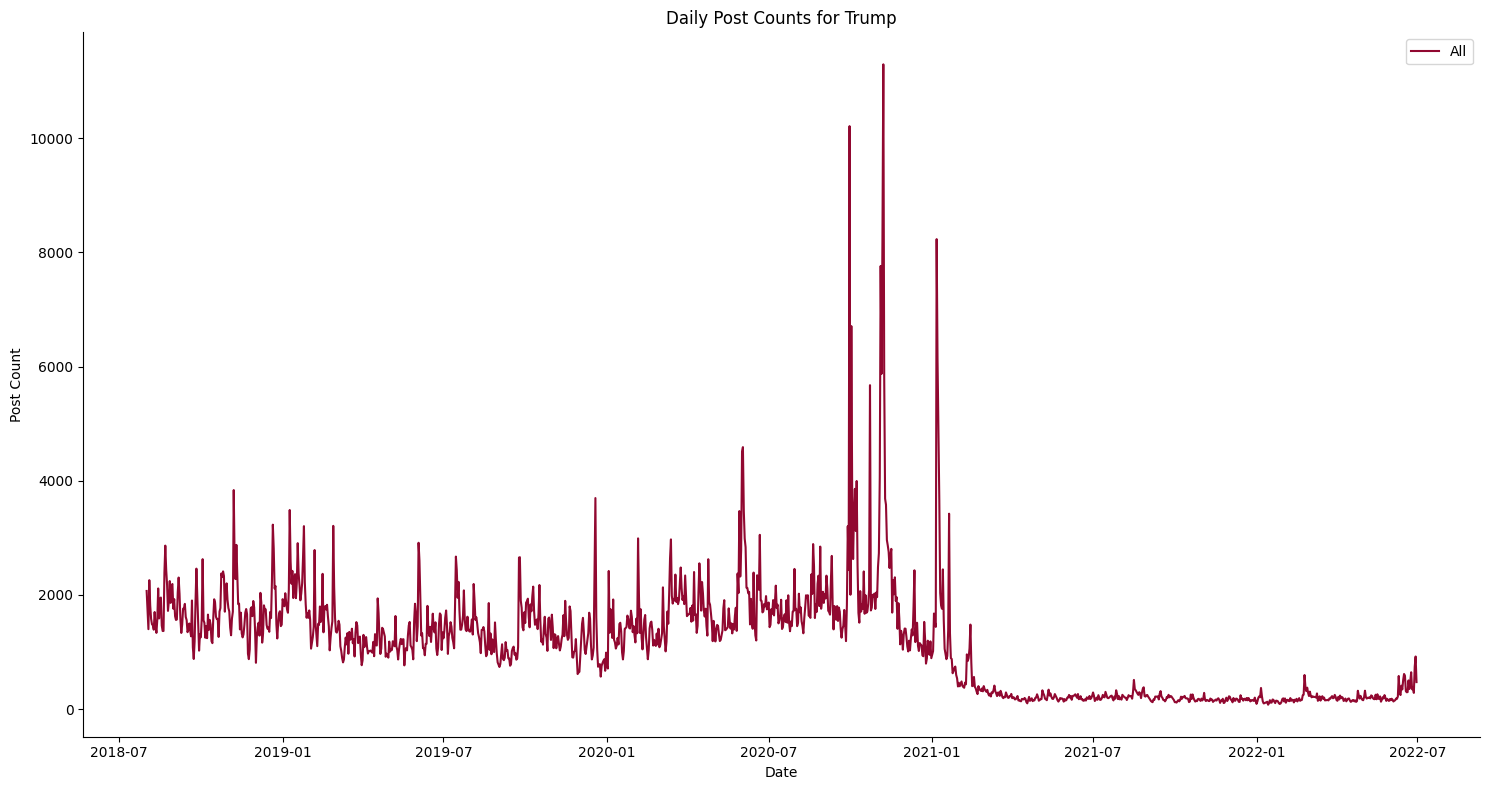

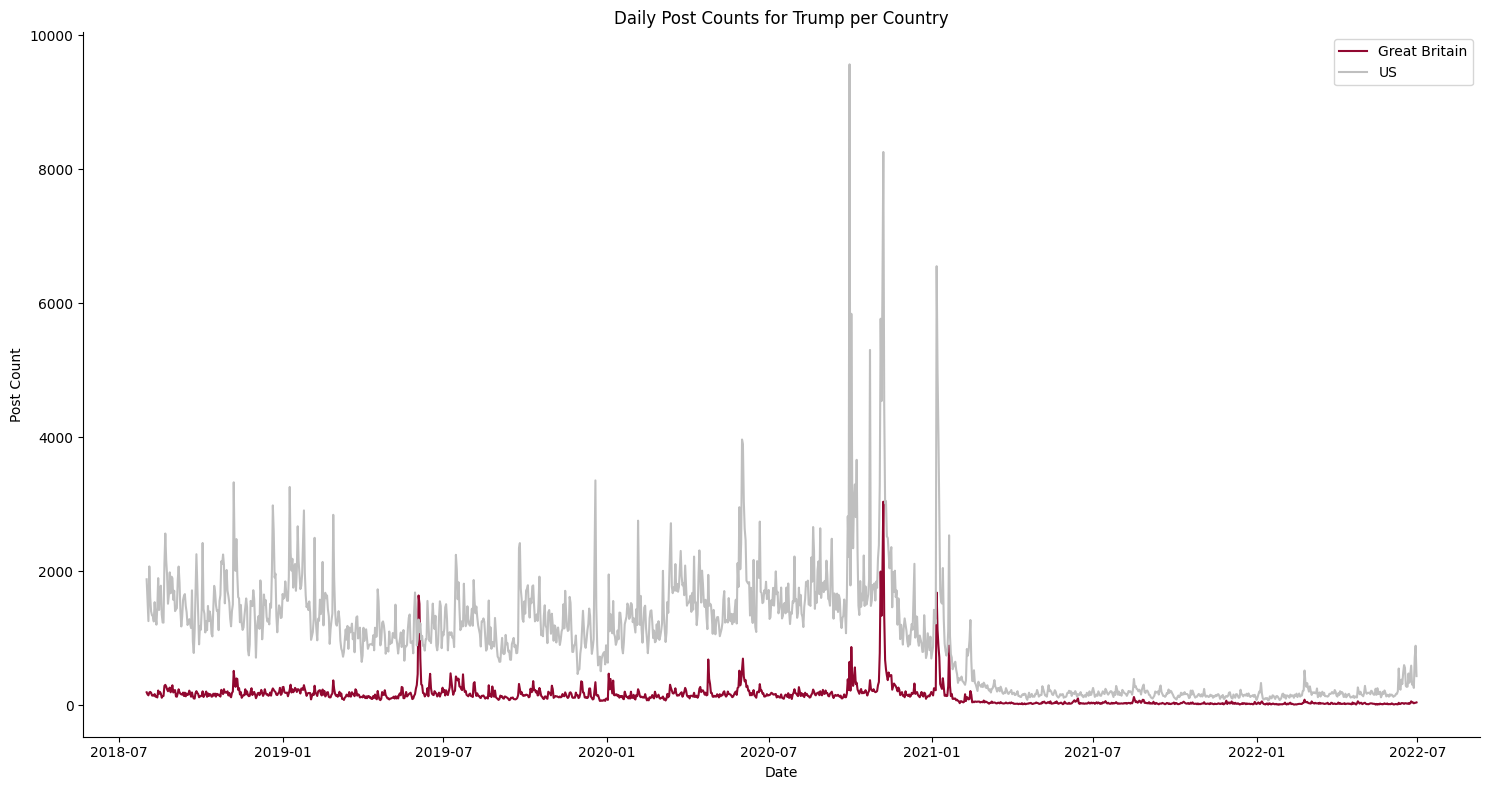

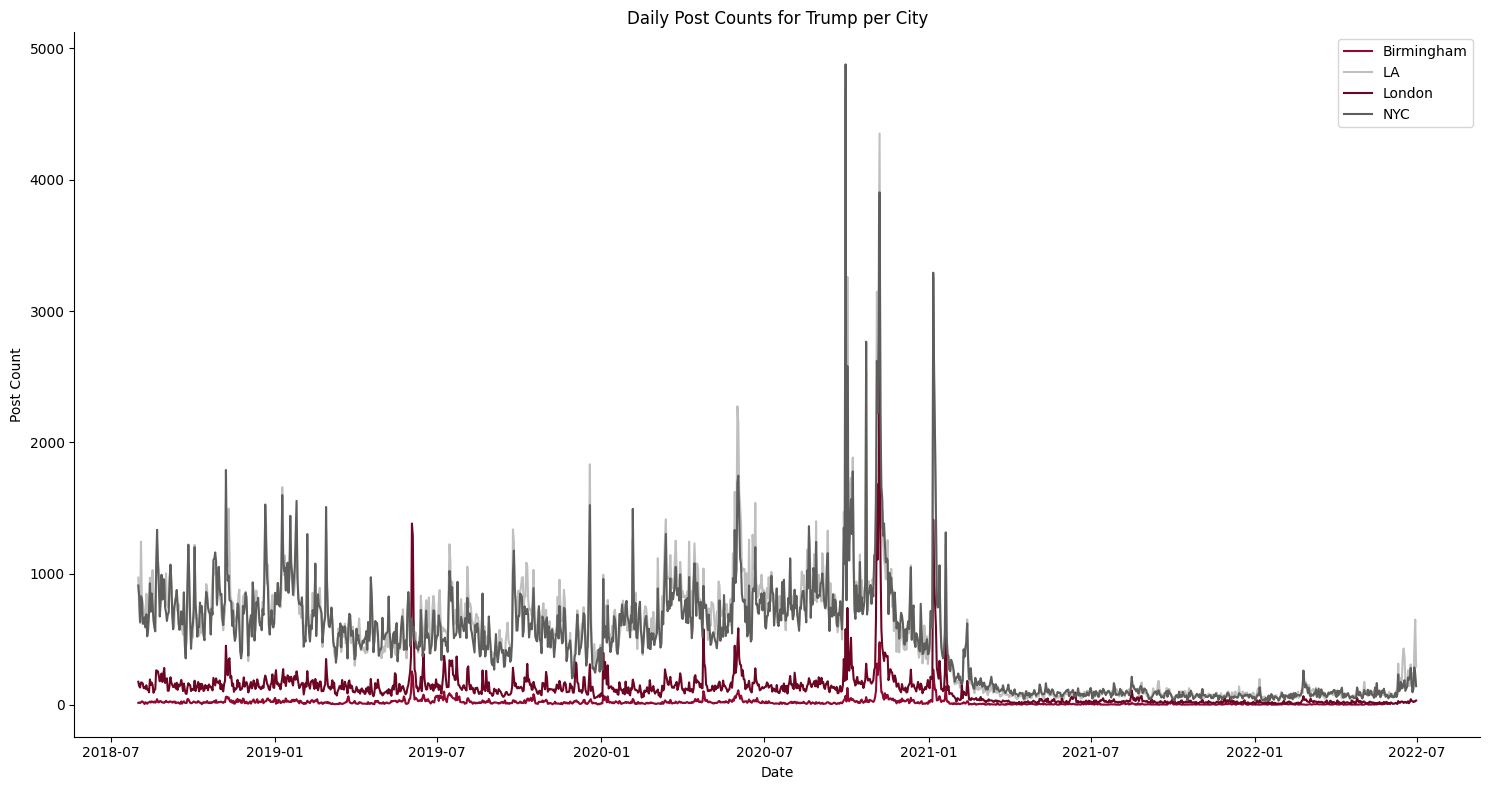

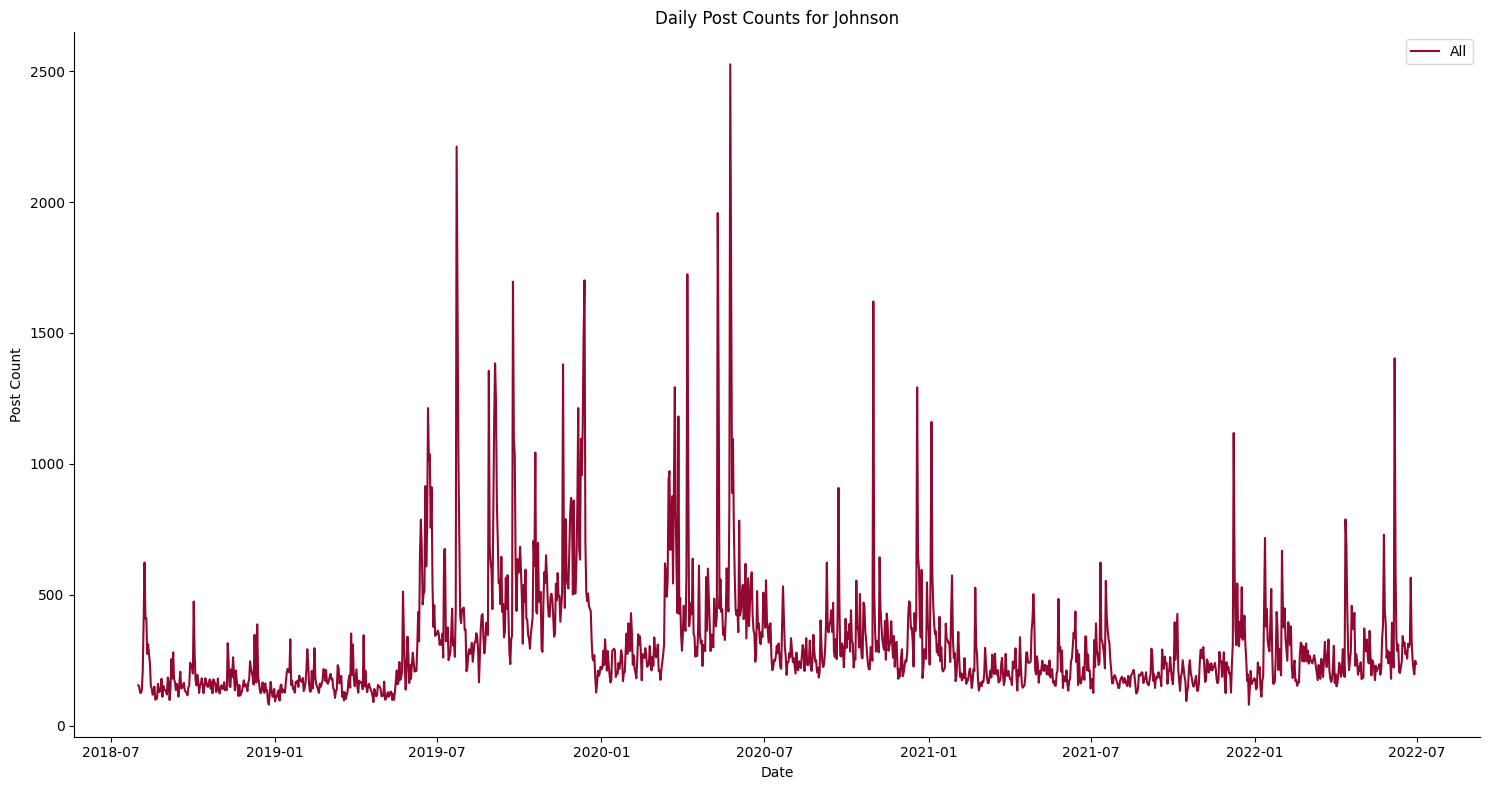

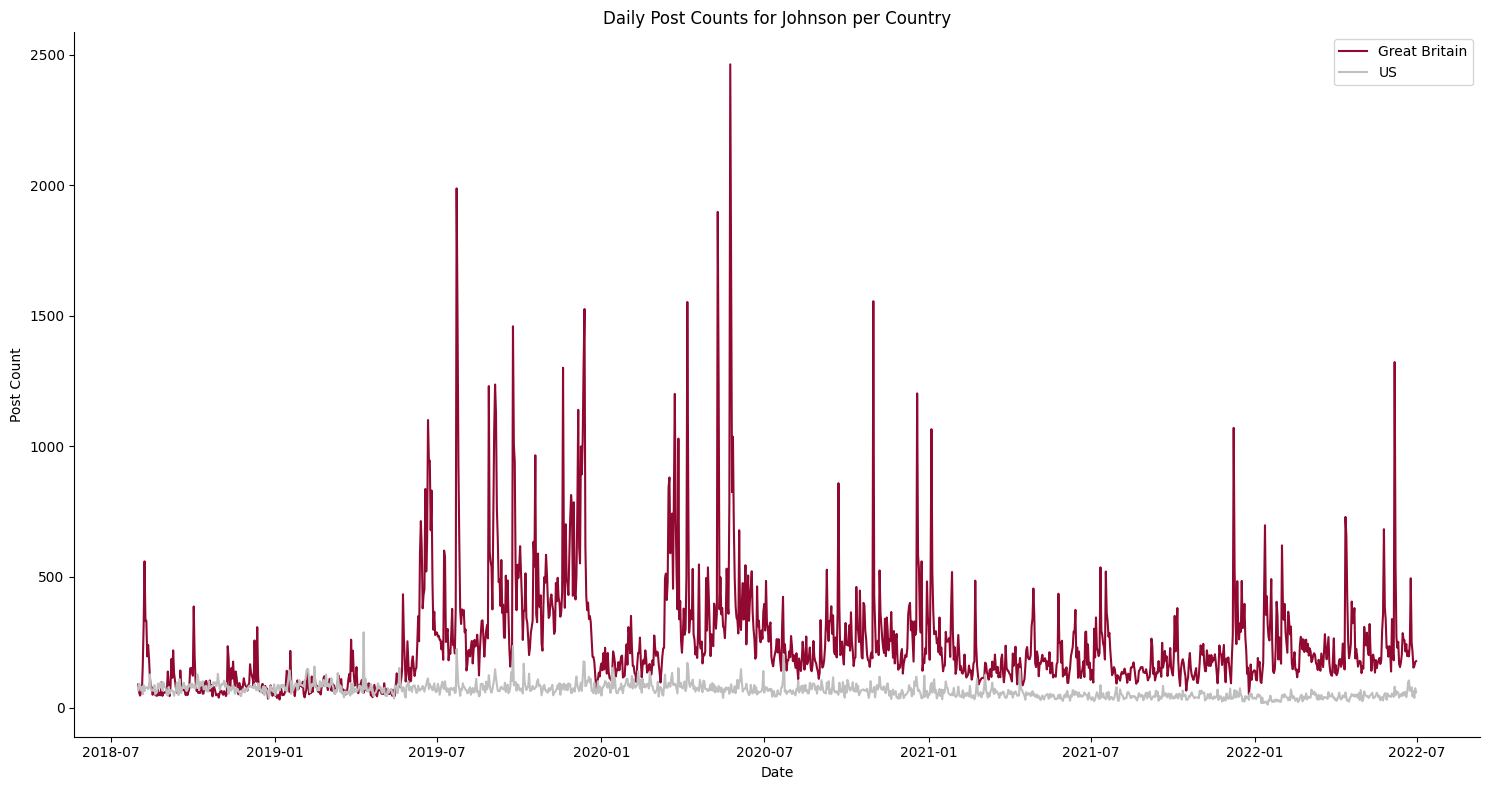

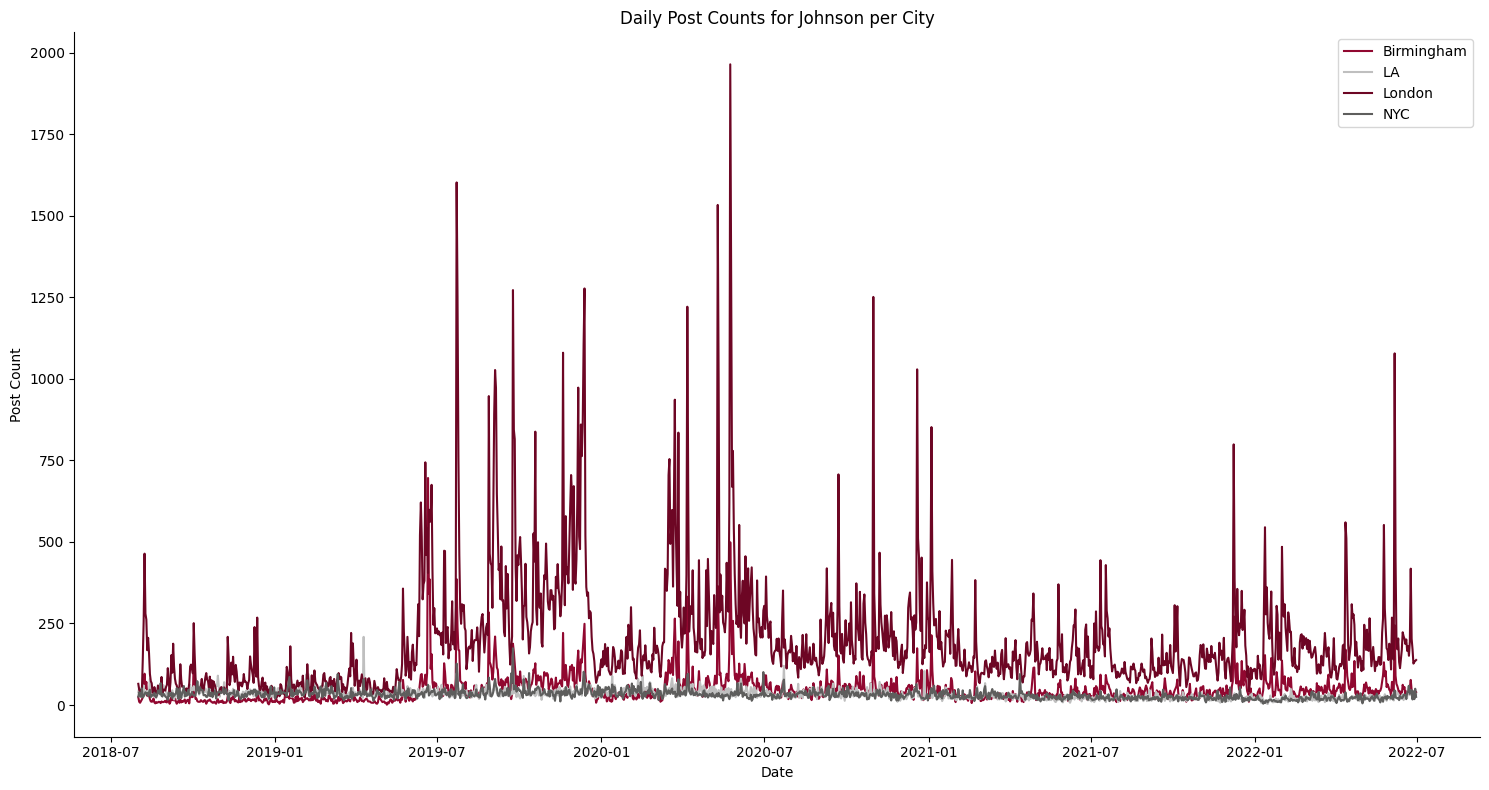

In [17]:
for president in presidents:
    data = daily_tweet_counts_trump if president == presidents[0] else daily_tweet_counts_johnson
    
    plot_daily_tweet_counts(
        post_counts=data,
        title=f"Daily Post Counts for {president.capitalize()}",
        count_columns=['All'],
        save_path=f'visualizations/tweet_count/{president}-tweet_count.png'  
    )

    plot_daily_tweet_counts(
        post_counts=data,
        title=f"Daily Post Counts for {president.capitalize()} per Country",
        count_columns=countries,
        save_path=f'visualizations/tweet_count/{president}-countries-tweet_count.png'
    )

    plot_daily_tweet_counts(
        post_counts=data,
        title=f"Daily Post Counts for {president.capitalize()} per City",
        count_columns=cities,
        save_path=f'visualizations/tweet_count/{president}-cities-tweet_count.png'
    )

##### Normalize Daily Post Count

Normalize the daily post count by dividing with the monthly post count

In [18]:
monthly_tweet_count = pd.read_pickle('results/monthly_tweet_count.pkl')
monthly_tweet_count

2018_08    2018_09    2018_10    2018_11    2018_12  \
Birmingham      191433.0   191579.0   210056.0   196021.0   191220.0   
LA             1171088.0  1154324.0  1231818.0  1112827.0  1081696.0   
London          788735.0   823528.0   852263.0   825937.0   788404.0   
NYC            1038041.0  1077902.0  1118985.0  1012020.0   984489.0   
Great Britain   980168.0  1015107.0  1062319.0  1021958.0   979624.0   
US             2209129.0  2232226.0  2350803.0  2124847.0  2066185.0   
All            3189297.0  3247333.0  3413122.0  3146805.0  3045809.0   

                 2019_01    2019_02    2019_03    2019_04    2019_05  ...  \
Birmingham      192694.0   180492.0   176343.0   171053.0   189581.0  ...   
LA             1181323.0  1086208.0   925107.0   965585.0  1000215.0  ...   
London          833817.0   761305.0   745724.0   701682.0   779578.0  ...   
NYC            1008954.0   911139.0   817539.0   844749.0   891154.0  ...   
Great Britain  1026511.0   941797.0   922067.0   872735.0   969159.0  ...   
US             2190277.0  1997347.0  1742646.0  1810334.0  1891369.0  ...   
All            3216788.0  2939144.0  2664713.0  2683069.0  2860528.0  ...   

                 2021_09    2021_10    2021_11    2021_12    2022_01  \
Birmingham      117748.0   115224.0   115670.0   120246.0    92343.0   
LA              619445.0   661769.0   605353.0   587364.0   419469.0   
London          468218.0   485879.0   464786.0   467816.0   354041.0   
NYC             610744.0   610459.0   582877.0   574649.0   423957.0   
Great Britain   585966.0   601103.0   580456.0   588062.0   446384.0   
US             1230189.0  1272228.0  1188230.0  1162013.0   843426.0   
All            1816155.0  1873331.0  1768686.0  1750075.0  1289810.0   

                 2022_02    2022_03    2022_04    2022_05    2022_06  
Birmingham       83309.0   101421.0   108992.0   125573.0   123247.0  
LA              441942.0   551023.0   561438.0   626102.0   627947.0  
London          330898.0   399953.0   411581.0   485100.0   473426.0  
NYC             404103.0   518088.0   505101.0   561737.0   602978.0  
Great Britain   414207.0   501374.0   520573.0   610673.0   596673.0  
US              846045.0  1069111.0  1066539.0  1187839.0  1230925.0  
All            1260252.0  1570485.0  1587112.0  1798512.0  1827598.0  

[7 rows x 47 columns]

In [20]:
def normalize_daily_tweet_counts(daily_tweet_counts):
    # Convert the 'day' column in daily_tweet_counts to datetime to easily extract year and month
    daily_tweet_counts['day'] = pd.to_datetime(daily_tweet_counts['day'])
    
    # For each location, normalize the daily post count
    locations = countries + cities + ['All']
    
    for location in locations:
        # Apply normalization for each row
        daily_tweet_counts[location] = daily_tweet_counts.apply(lambda row: normalize_row(row, location), axis=1)
    
    return daily_tweet_counts

def normalize_row(row, location):
    # Extract year and month from the 'day' column
    year_month = row['day'].strftime('%Y_%m')
    
    # Lookup the monthly post count for the location
    monthly_count = monthly_tweet_count.loc[location, year_month]
    
    # Return the normalized daily count
    return row[location] / monthly_count if monthly_count else row[location]

In [21]:
# normalize data with normalize_daily_tweet_counts
normalized_daily_tweet_counts_trump = normalize_daily_tweet_counts(daily_tweet_counts_trump)
normalized_daily_tweet_counts_johnson = normalize_daily_tweet_counts(daily_tweet_counts_johnson)
del daily_tweet_counts_trump, daily_tweet_counts_johnson
# save data
normalized_daily_tweet_counts_trump.to_pickle(f'{data_path}normalized_daily_tweet_counts_trump.pkl')
normalized_daily_tweet_counts_johnson.to_pickle(f'{data_path}normalized_daily_tweet_counts_johnson.pkl')

In [22]:
normalized_daily_tweet_counts_trump.head()

day       All  Great Britain        US  Birmingham        LA  \
0 2018-08-01  0.000649       0.000195  0.000850    0.000078  0.000827   
1 2018-08-02  0.000541       0.000164  0.000708    0.000094  0.000628   
2 2018-08-03  0.000439       0.000149  0.000568    0.000073  0.000532   
3 2018-08-04  0.000708       0.000192  0.000937    0.000094  0.001061   
4 2018-08-05  0.000569       0.000201  0.000732    0.000141  0.000689   

     London       NYC  
0  0.000223  0.000876  
1  0.000181  0.000797  
2  0.000167  0.000608  
3  0.000216  0.000797  
4  0.000216  0.000781

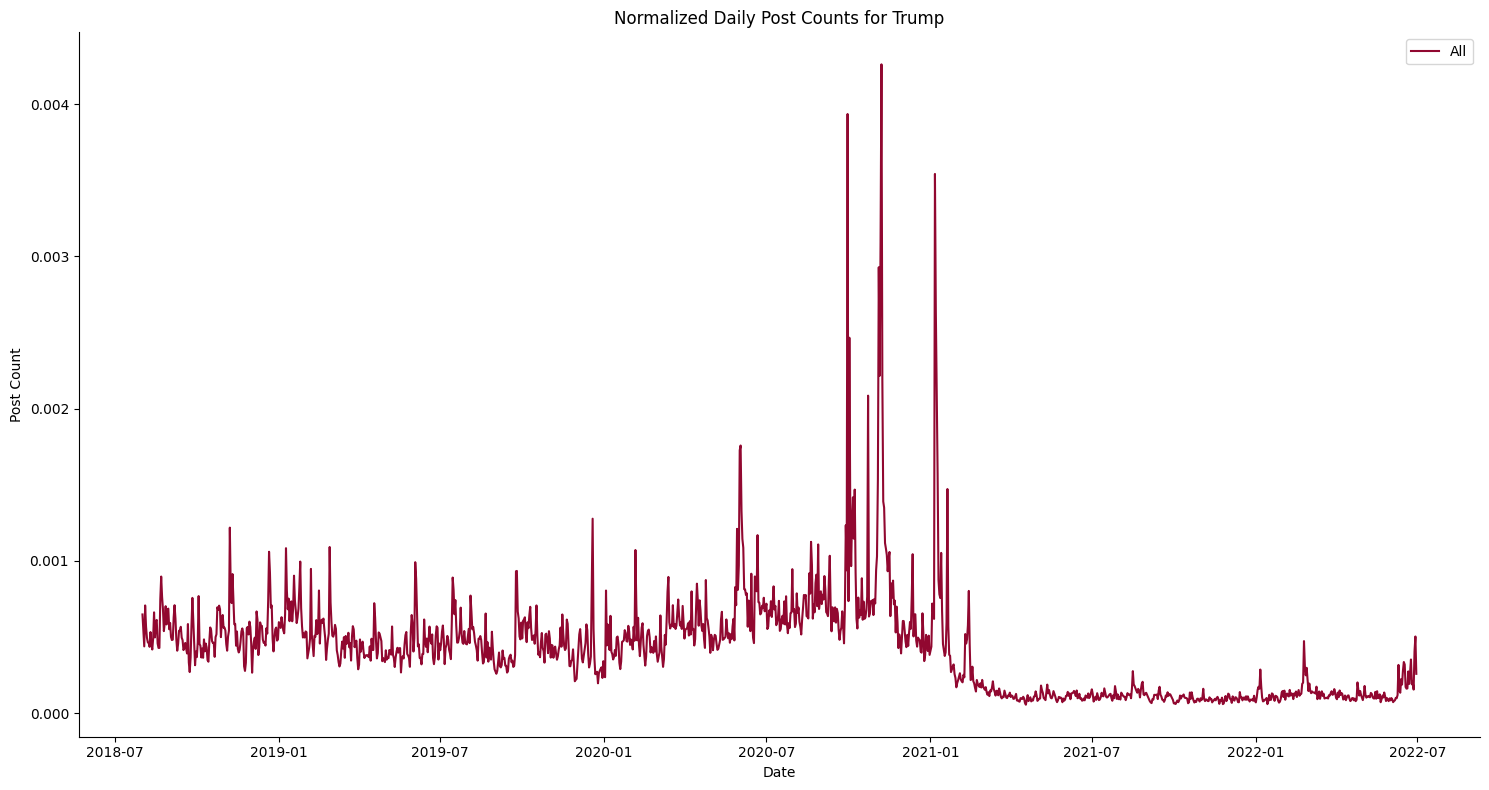

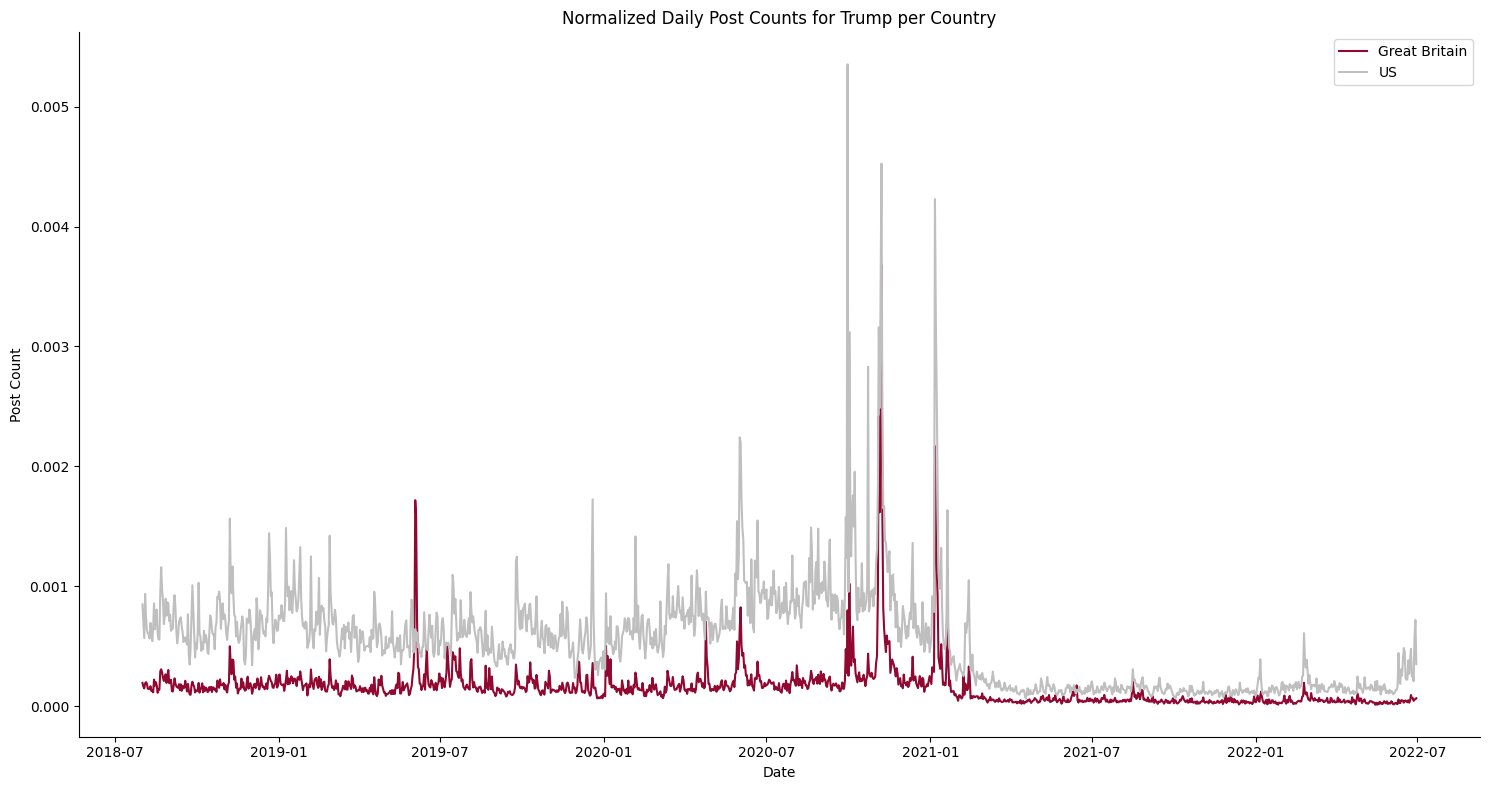

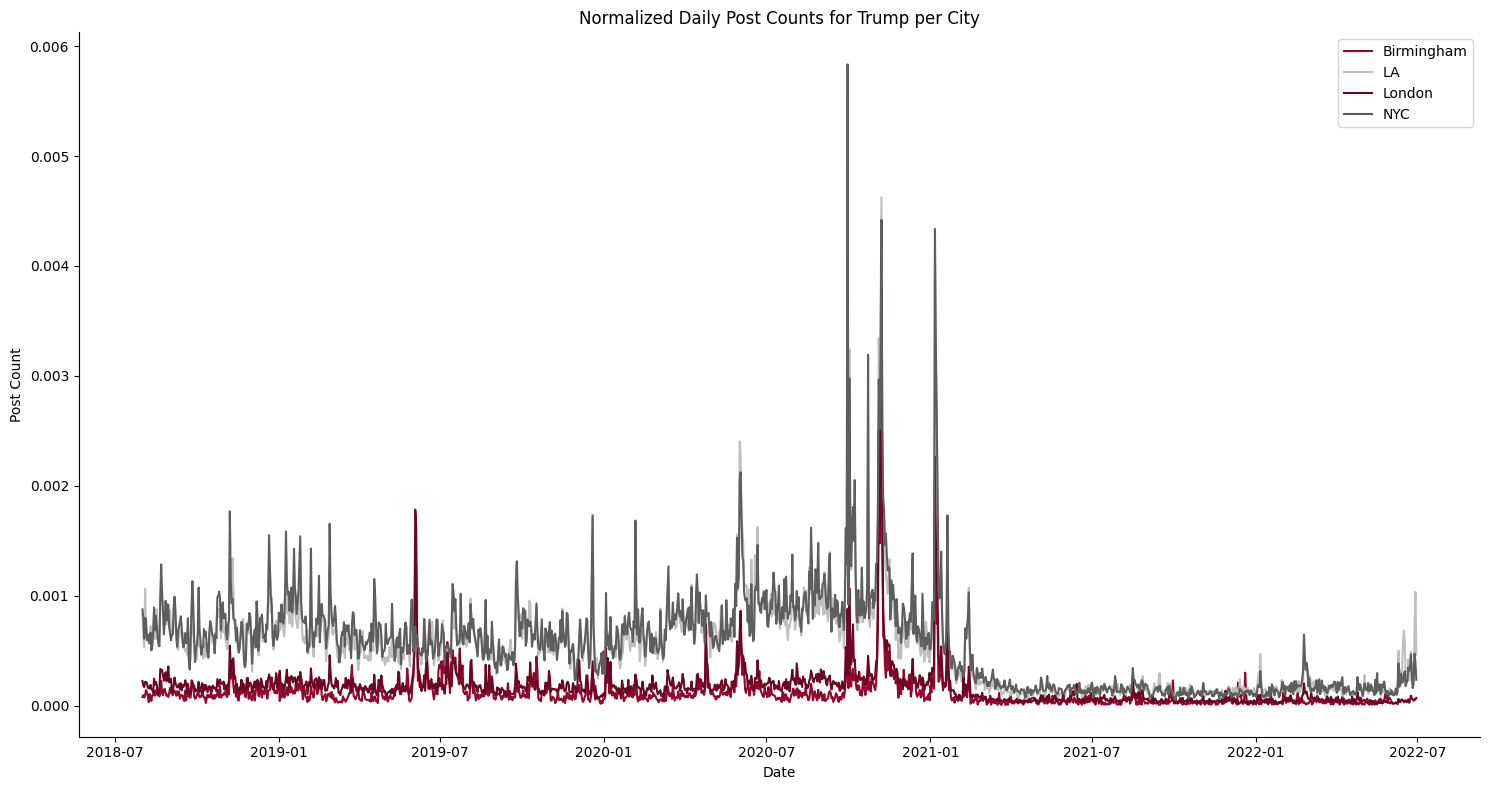

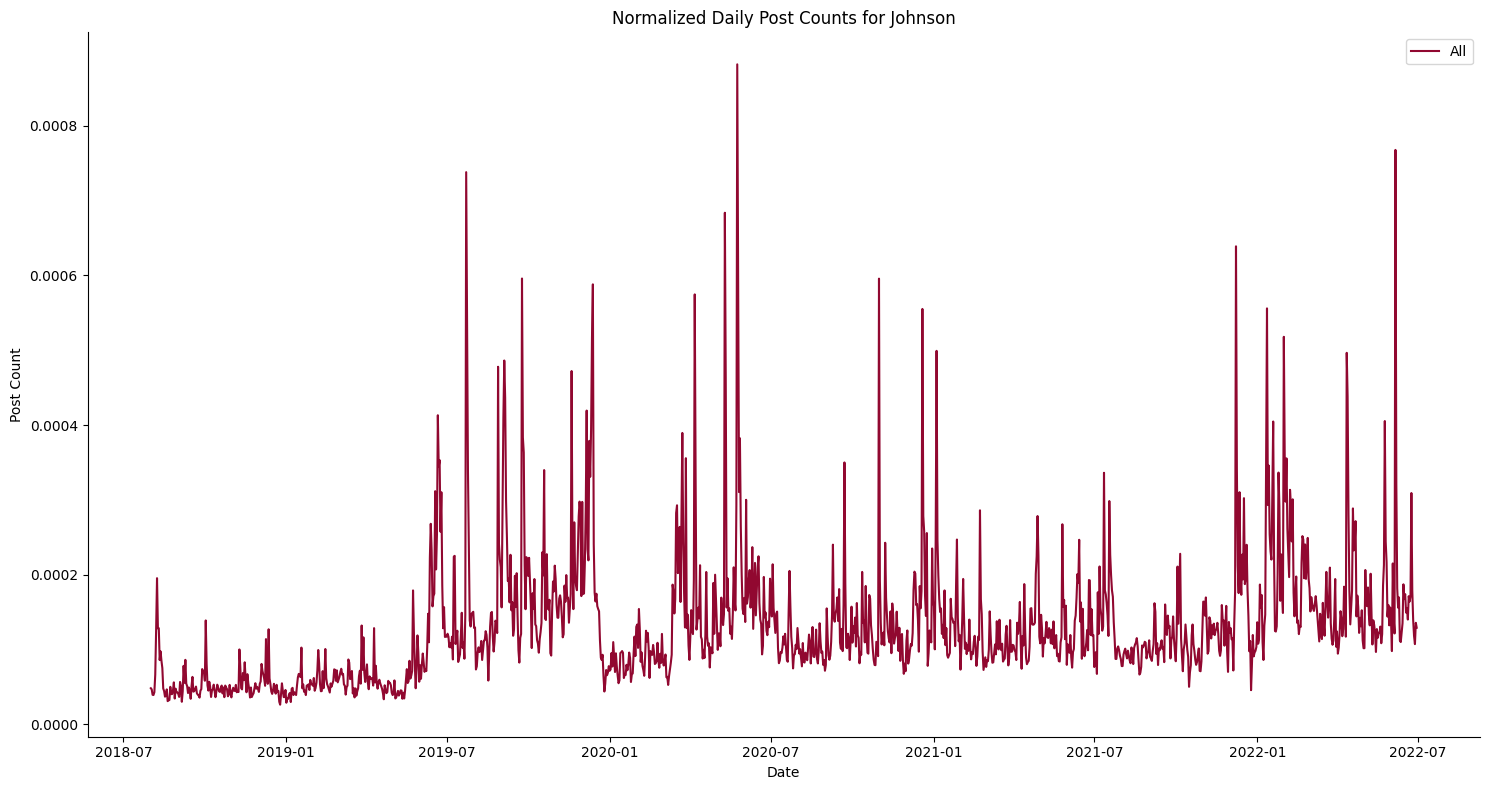

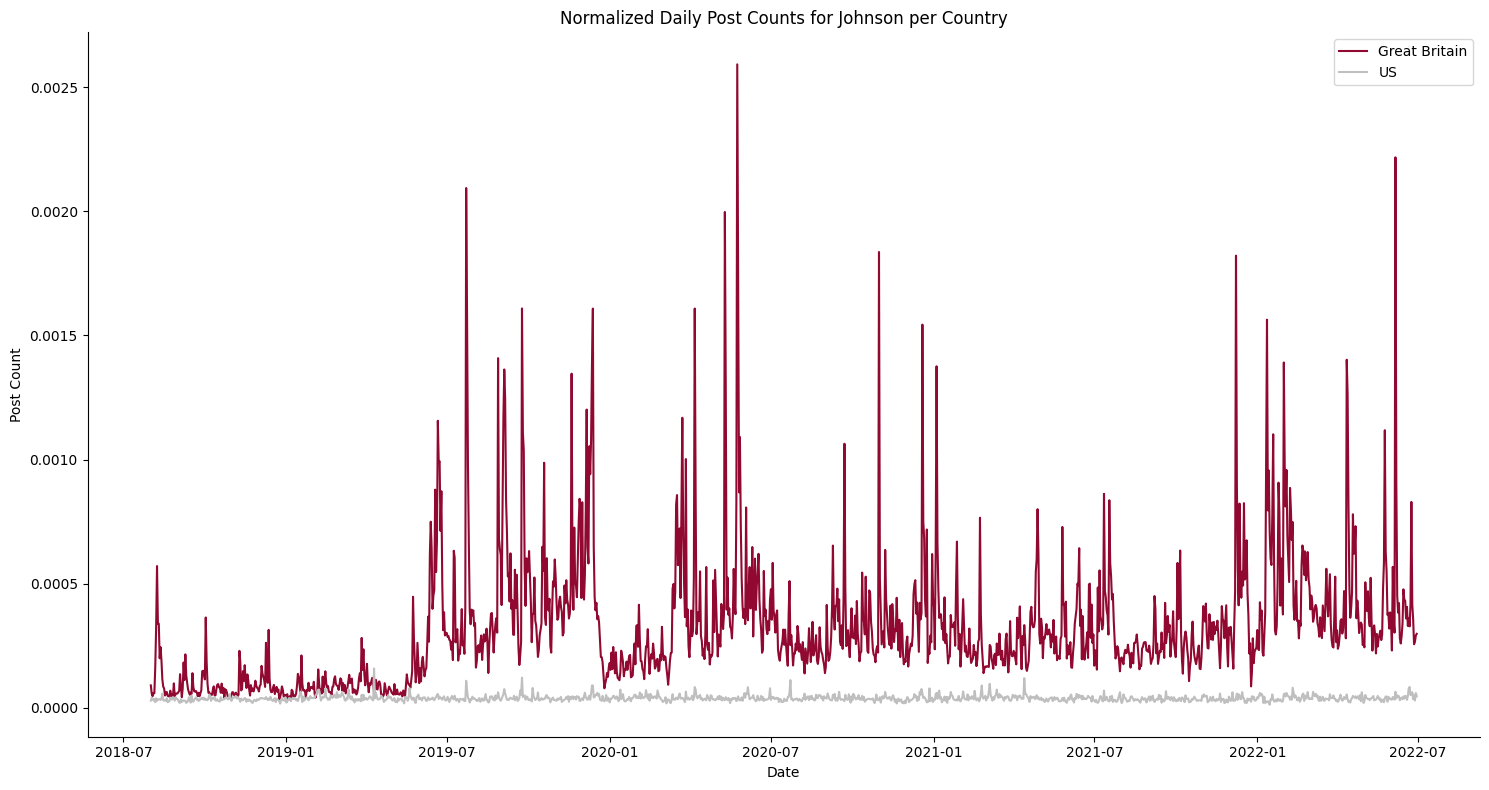

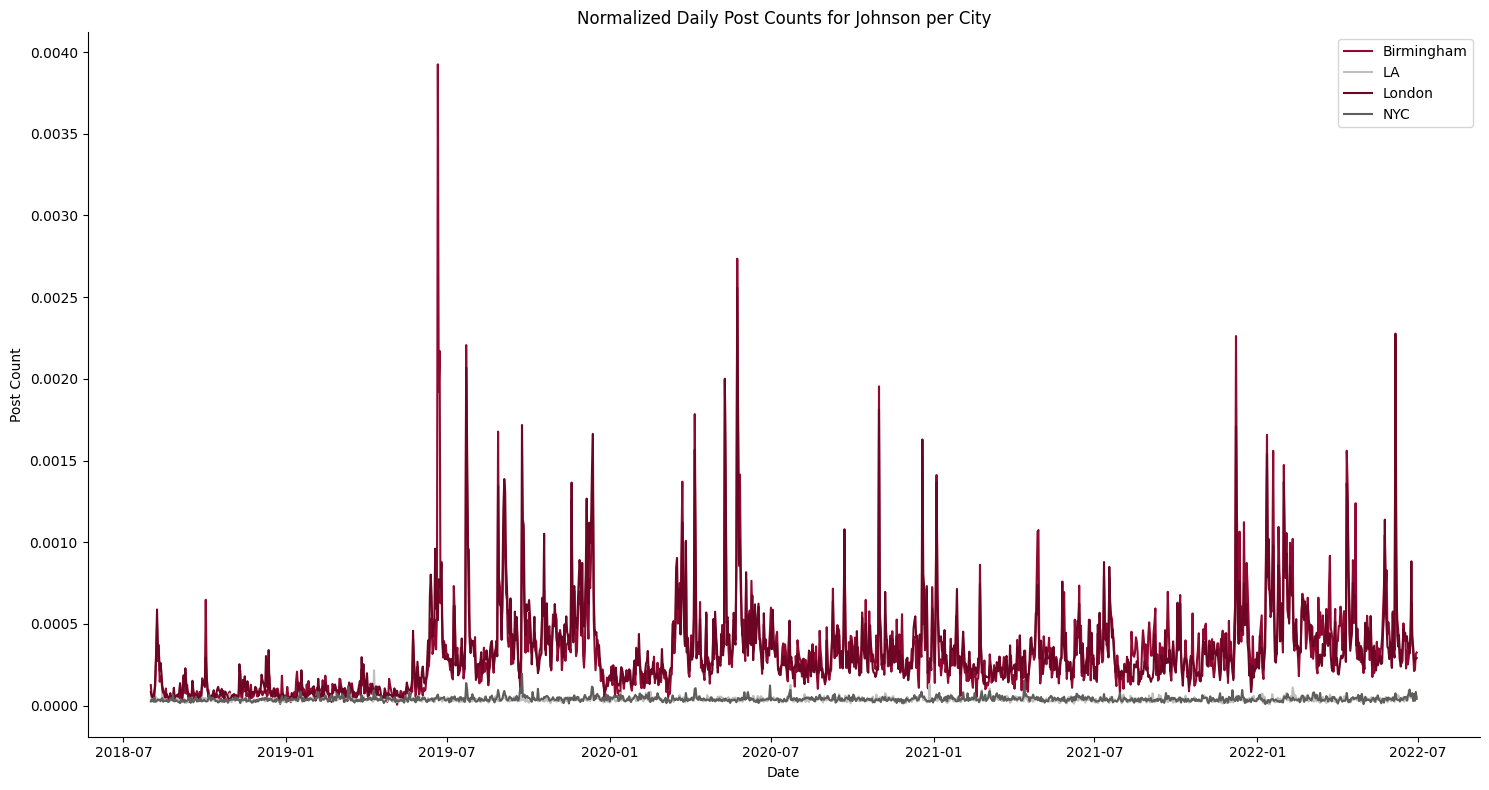

In [23]:
for president in presidents:
    data = normalized_daily_tweet_counts_trump if president == presidents[0] else normalized_daily_tweet_counts_johnson
    
    plot_daily_tweet_counts(
        post_counts=data,
        title=f"Normalized Daily Post Counts for {president.capitalize()}",
        count_columns=['All'],
        save_path=f'visualizations/tweet_count/{president}-normalized_tweet_count.png'  
    )

    plot_daily_tweet_counts(
        post_counts=data,
        title=f"Normalized Daily Post Counts for {president.capitalize()} per Country",
        count_columns=countries,
        save_path=f'visualizations/tweet_count/{president}-countries-normalized_tweet_count.png'
    )

    plot_daily_tweet_counts(
        post_counts=data,
        title=f"Normalized Daily Post Counts for {president.capitalize()} per City",
        count_columns=cities,
        save_path=f'visualizations/tweet_count/{president}-cities-normalized_tweet_count.png'
    )

### Inspect Post Counts

##### Absolute Values

In [24]:
def get_top_dates(df, column, nlargest=10):
    """
    Get the rows corresponding to the highest 10 values of a specified column in a DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    column (str): The name of the column to find the top 10 values in.

    Returns:
    DataFrame: A DataFrame containing the rows with the top 10 values of the specified column.
    """
    return df.nlargest(nlargest, column)

def get_top_ten_days(data, president):
    for location in countries + cities:
        print(president.capitalize(), location)
        print(get_top_dates(data, location)[['day', location]].to_string(index=False),"\n")

In [25]:
# get original post data because it was previously normalized
daily_tweet_counts_trump = pd.read_pickle(f'{data_path}daily_tweet_counts_trump.pkl')
daily_tweet_counts_johnson = pd.read_pickle(f'{data_path}daily_tweet_counts_johnson.pkl')

In [26]:
get_top_ten_days(daily_tweet_counts_trump, presidents[0])
get_top_ten_days(daily_tweet_counts_johnson, presidents[1])

Trump Great Britain
       day  Great Britain
2020-11-07           3036
2020-11-06           2000
2020-11-04           1994
2021-01-06           1680
2019-06-03           1636
2019-06-04           1510
2020-11-05           1334
2020-11-08           1334
2021-01-07           1126
2021-01-08            888 

Trump US
       day   US
2020-09-30 9564
2020-11-07 8256
2021-01-06 6551
2020-11-06 6198
2020-10-02 5841
2020-11-04 5767
2020-10-23 5301
2021-01-07 5001
2020-11-05 4538
2020-11-08 4470 

Trump Birmingham
       day  Birmingham
2020-11-07       477.0
2020-11-06       327.0
2020-11-04       314.0
2021-01-06       269.0
2019-06-03       255.0
2020-11-05       227.0
2019-06-04       223.0
2020-11-08       217.0
2021-01-07       172.0
2021-01-20       140.0 

Trump LA
       day   LA
2020-09-30 4685
2020-11-07 4352
2020-11-06 3384
2020-10-02 3260
2021-01-06 3259
2020-11-04 3147
2020-10-23 2535
2021-01-07 2510
2020-11-05 2315
2020-06-01 2274 

Trump London
       day  London
2020-11-07    

##### Normalized Values

In [27]:
get_top_ten_days(normalized_daily_tweet_counts_trump, presidents[0])
get_top_ten_days(normalized_daily_tweet_counts_johnson, presidents[1])

Trump Great Britain
       day  Great Britain
2020-11-07       0.003680
2020-11-06       0.002424
2020-11-04       0.002417
2021-01-06       0.002168
2019-06-03       0.001718
2020-11-05       0.001617
2020-11-08       0.001617
2019-06-04       0.001586
2021-01-07       0.001453
2021-01-08       0.001146 

Trump US
       day       US
2020-09-30 0.005352
2020-11-07 0.004525
2021-01-06 0.004229
2020-11-06 0.003397
2021-01-07 0.003228
2020-11-04 0.003161
2020-10-02 0.003120
2020-10-23 0.002831
2021-01-08 0.002605
2020-11-05 0.002487 

Trump Birmingham
       day  Birmingham
2020-11-07    0.003101
2020-11-06    0.002126
2020-11-04    0.002042
2021-01-06    0.001774
2020-11-05    0.001476
2019-06-03    0.001438
2020-11-08    0.001411
2019-06-04    0.001258
2021-01-07    0.001134
2021-01-20    0.000923 

Trump LA
       day       LA
2020-09-30 0.004928
2020-11-07 0.004623
2021-01-06 0.004125
2020-11-06 0.003595
2020-11-04 0.003343
2020-10-02 0.003241
2021-01-07 0.003177
2021-01-08 0.002553


In [91]:
# load normalized data if necessary
normalized_daily_tweet_counts_trump = pd.read_pickle(f'{data_path}normalized_daily_tweet_counts_trump.pkl')
normalized_daily_tweet_counts_johnson = pd.read_pickle(f'{data_path}normalized_daily_tweet_counts_johnson.pkl')

In [297]:
def get_normalized_post_count(data, date=None, type=None, start_date=None, end_date=None, location='All'):
    if date:
        post_count = data[
            data['day'] == pd.Timestamp(date)
        ][location].iloc[0]
    elif start_date and end_date:
        data['day'] = pd.to_datetime(data['day'])  # Convert 'day' column to Timestamp objects
        start_date = pd.Timestamp(start_date)
        end_date = pd.Timestamp(end_date)
        timespan = data[(data['day'] >= start_date) & (data['day'] <= end_date)]
        post_count = timespan[location].mean()
    # multiply mean by 100 to get the percentage
    print(f'{type} NPC {round(post_count*100,3)}')

In [300]:
def get_CSS_NPC(president, date=None, type=None, start_date=None, end_date=None, location='All'):
    # CSS = Compound Sentiment Score
    # NPC = Normalized Post Count
    if president == 'trump':
        data_NPC = normalized_daily_tweet_counts_trump
        data_CSS = trump
    else: 
        data_NPC = normalized_daily_tweet_counts_johnson
        data_CSS = johnson
    get_normalized_post_count(data_NPC, date=date, type=type, start_date=start_date, end_date=end_date, location=location)
    get_mean_sentiment(data_CSS, date=date, type=type, start_date=start_date, end_date=end_date)

In [301]:
get_CSS_NPC('trump', '2020-01-05', type='Assasination of Qasem Soleimani')
get_CSS_NPC('trump', '2020-01-31', type='Public Health Emergency')
get_CSS_NPC('trump', '2020-03-13', type='National Emergency')

Assasination of Qasem Soleimani NPC 0.058
Assasination of Qasem Soleimani CSS -0.18
Public Health Emergency NPC 0.048
Public Health Emergency CSS -0.04
National Emergency NPC 0.09
National Emergency CSS -0.1


In [262]:
def get_normalized_post_count_timespan(data, start_date, end_date, type=None, location='All'):
    data['day'] = pd.to_datetime(data['day'])  # Convert 'day' column to Timestamp objects
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    timespan = data[(data['day'] >= start_date) & (data['day'] <= end_date)]
    # multiply mean by 100 to get the percentage
    mean = timespan[location].mean() * 100
    print(f'{type} NPC {round(mean,3)}')

In [302]:
# Trump
get_CSS_NPC('trump', start_date='2017-01-01', end_date='2023-01-01', type='Overall Mean')
get_CSS_NPC('trump', start_date='2017-01-01', end_date='2023-01-01', type='Overall Mean in GB', location='Great Britain')
get_CSS_NPC('trump', start_date='2017-01-01', end_date='2023-01-01', type='Overall Mean in US', location='US')
get_CSS_NPC('trump', start_date='2020-11-04', end_date='2020-11-08', type='Aftermath of the US Presidential Election')
get_CSS_NPC('trump', start_date='2020-09-30', end_date='2020-10-02', type='First Presidential Debate')
get_CSS_NPC('trump', start_date='2021-01-06', end_date='2021-01-07', type='Capitol Riot')
get_CSS_NPC('trump', start_date='2019-06-03', end_date='2019-06-04', type='GB State Visit: GB', location='Great Britain')
get_CSS_NPC('trump', start_date='2019-06-03', end_date='2019-06-04', type='GB State Visit: US', location='US')

Overall Mean NPC 0.042
Overall Mean CSS -0.05
Overall Mean in GB NPC 0.016
Overall Mean in GB CSS -0.05
Overall Mean in US NPC 0.054
Overall Mean in US CSS -0.05
Aftermath of the US Presidential Election NPC 0.294
Aftermath of the US Presidential Election CSS 0.01
First Presidential Debate NPC 0.238
First Presidential Debate CSS -0.04
Capitol Riot NPC 0.309
Capitol Riot CSS -0.15
GB State Visit: GB NPC 0.165
GB State Visit: GB CSS 0.01
GB State Visit: US NPC 0.06
GB State Visit: US CSS 0.01


In [303]:
# Johnson
get_CSS_NPC('johnson', start_date='2017-01-01', end_date='2023-01-01', type='Overall Mean')
get_CSS_NPC('johnson', start_date='2017-01-01', end_date='2023-01-01', type='Overall Mean in GB', location='Great Britain')
get_CSS_NPC('johnson', start_date='2017-01-01', end_date='2023-01-01', type='Overall Mean in US', location='US')

Overall Mean NPC 0.013
Overall Mean CSS 0.06
Overall Mean in GB NPC 0.032
Overall Mean in GB CSS 0.06
Overall Mean in US NPC 0.004
Overall Mean in US CSS 0.06


In [304]:
# overall normalized post counts
get_CSS_NPC('trump', start_date='2017-01-20', end_date='2021-01-20', type="Trump's Presidency")
get_CSS_NPC('trump', start_date='2021-01-21', end_date='2023-01-01', type="After Trump's Presidency")
get_CSS_NPC('johnson', start_date='2017-01-01', end_date='2019-07-23', type="Before Johnson's Term")
get_CSS_NPC('johnson', start_date='2019-07-24', end_date='2022-09-06', type="Before Johnson's")

Trump's Presidency NPC 0.059
Trump's Presidency CSS -0.05
After Trump's Presidency NPC 0.013
After Trump's Presidency CSS -0.03
Before Johnson's Term NPC 0.007
Before Johnson's Term CSS 0.13
Before Johnson's NPC 0.015
Before Johnson's CSS 0.05
